In [139]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [140]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [141]:
#Start with spring and work our way down to winter
season = 1
season_year = 2007
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2007-03-01 to 2007-05-31
Columns: 278 entries, 10000009 to 25000592
dtypes: float64(278)
memory usage: 200.5 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2007-03-01  4.235797  2.372447  5.408747  2.627506  4.330897  4.263458   
2007-03-02  5.496816  2.504688  5.389713  2.676347  2.255415  2.220294   
2007-03-03  3.991834  2.190823  5.199624  2.274858  1.628739  1.603377   
2007-03-04  2.325962  1.832495  3.665601  1.919321  1.373356  1.351971   
2007-03-05  2.087035  1.710025  2.832404  1.891864  1.461034  1.438283   
...              ...       ...       ...       ...       ...       ...   
2007-05-27  0.715465  0.721732  0.370693  0.861724  0.655329  0.645124   
2007-05-28  0.749223  0.758460  0.517141  0.896309  0.695236  0.684410   
2007-05-29  0.759976  0.741542  0.406974  0.898582  0.697149  0.686293   
2007-05-30  0.806187  0.879851  0.596725  0.993045  0.813274  0.800610   
2007-05-31  0.751709  0.775923  0.413658  0.957012  0.738506  0.727007   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-03-01  2.540876  5.097897  

          2007-03-01  2007-03-02  2007-03-03  2007-03-04  2007-03-05  \
10000009   -0.036514    0.071621    0.008464   -0.073843   -0.078883   
10000010   -0.152560   -0.118133   -0.107760   -0.106046   -0.103452   
10000011    0.036535    0.064828    0.086406    0.013581   -0.030309   
10000014   -0.136675   -0.107246   -0.102337   -0.100380   -0.091602   
10000016   -0.030591   -0.133941   -0.144033   -0.136009   -0.119678   
...              ...         ...         ...         ...         ...   
7000003    -0.046033    0.009254    0.059131    0.090105    0.088471   
8000001    -0.004245    0.057255    0.075701    0.082497    0.074113   
9000001    -0.019153    0.161612    0.237035    0.218415    0.149444   
9000015    -0.038107    0.129253    0.200688    0.185740    0.123597   
25000592   -0.073114   -0.072074   -0.062775   -0.046401   -0.044302   

          2007-03-06  2007-03-07  2007-03-08  2007-03-09  2007-03-10  ...  \
10000009   -0.059443   -0.056719   -0.074513   -0.089702  

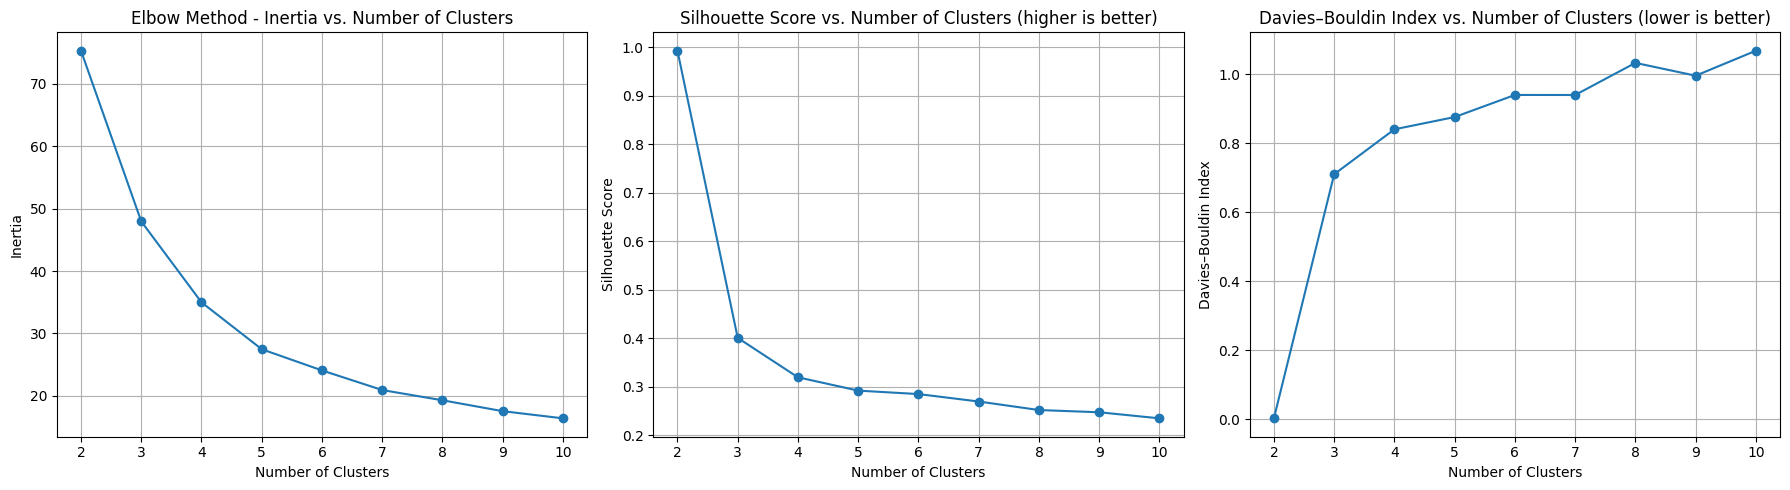

In [142]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2007-03-01  4.235797  2.372447  5.408747  2.627506  4.330897  4.263458   
2007-03-02  5.496816  2.504688  5.389713  2.676347  2.255415  2.220294   
2007-03-03  3.991834  2.190823  5.199624  2.274858  1.628739  1.603377   
2007-03-04  2.325962  1.832495  3.665601  1.919321  1.373356  1.351971   
2007-03-05  2.087035  1.710025  2.832404  1.891864  1.461034  1.438283   
...              ...       ...       ...       ...       ...       ...   
2007-05-27  0.715465  0.721732  0.370693  0.861724  0.655329  0.645124   
2007-05-28  0.749223  0.758460  0.517141  0.896309  0.695236  0.684410   
2007-05-29  0.759976  0.741542  0.406974  0.898582  0.697149  0.686293   
2007-05-30  0.806187  0.879851  0.596725  0.993045  0.813274  0.800610   
2007-05-31  0.751709  0.775923  0.413658  0.957012  0.738506  0.727007   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-03-01  2.540876  5.097897  

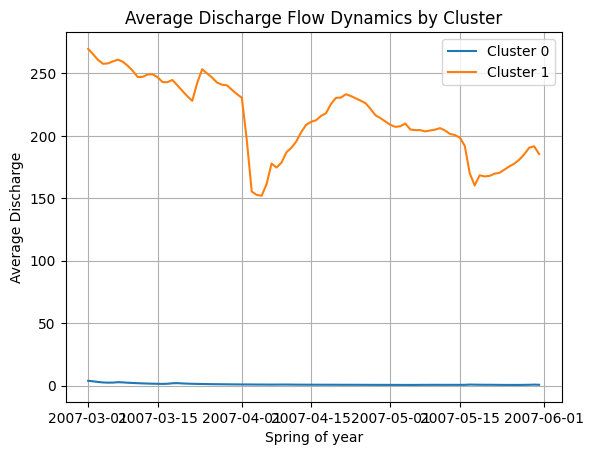

In [143]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [144]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [145]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2007-03-01  4.235797  2.372447  5.408747  2.627506  4.330897  4.263458   
2007-03-02  5.496816  2.504688  5.389713  2.676347  2.255415  2.220294   
2007-03-03  3.991834  2.190823  5.199624  2.274858  1.628739  1.603377   
2007-03-04  2.325962  1.832495  3.665601  1.919321  1.373356  1.351971   
2007-03-05  2.087035  1.710025  2.832404  1.891864  1.461034  1.438283   
...              ...       ...       ...       ...       ...       ...   
2007-05-27  0.715465  0.721732  0.370693  0.861724  0.655329  0.645124   
2007-05-28  0.749223  0.758460  0.517141  0.896309  0.695236  0.684410   
2007-05-29  0.759976  0.741542  0.406974  0.898582  0.697149  0.686293   
2007-05-30  0.806187  0.879851  0.596725  0.993045  0.813274  0.800610   
2007-05-31  0.751709  0.775923  0.413658  0.957012  0.738506  0.727007   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-03-01  2.540876  5.097897  3.069710  4.360453  ...  4.757702  6.419707   
2007-03-02  2.830277  4.724572  2.200519  2.645912  ...  4.163433  4.979807   
2007-03-03  3.018774  4.365936  1.617493  1.918893  ...  3.193374  3.362930   
2007-03-04  3.108282  4.089612  1.351321  1.611837  ...  2.405879  2.686402   
2007-03-05  3.140488  4.051078  1.421825  1.721569  ...  2.020974  2.332392   
...              ...       ...       ...       ...  ...       ...       ...   
2007-05-27  0.600612  0.855155  0.704179  0.413615  ...  0.099760  0.208461   
2007-05-28  0.606170  0.900075  0.695839  0.460244  ...  0.446779  0.187691   
2007-05-29  0.604738  0.878186  0.686706  0.471731  ...  0.384161  0.261213   
2007-05-30  0.632600  1.024970  0.675303  0.530074  ...  0.394798  0.268449   
2007-05-31  0.645755  0.966279  0.670027  0.476417  ...  0.276378  0.200288   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2007-03-01  3.938020  9.811777  7.151160  4.082958  4.753951  4.514572   
2007-03-02  4.215311  6.835132  9.067912  4.513379  5.270297  6.915842   
2007-03-03  2.532105  4.362533  7.518444  4.776974  5.033733  7.533781   
2007-03-04  1.611307  3.067402  6.163804  4.838228  4.721637  6.804388   
2007-03-05  1.200446  2.575140  5.214993  4.655088  4.434754  5.590713   
...              ...       ...       ...       ...       ...       ...   
2007-05-27  0.130234  0.226798  0.391278  0.355165  0.418920  1.429772   
2007-05-28  0.112997  0.187817  0.366034  0.413060  0.817593  1.427248   
2007-05-29  0.172368  0.329566  0.441765  0.434800  0.711275  1.402859   
2007-05-30  0.178114  0.343741  0.454387  0.440896  0.679450  1.437269   
2007-05-31  0.124488  0.209080  0.391278  0.436782  0.621923  1.449866   

             9000015  25000592  
2007-03-01  4.210220  3.648102  
2007-03-02  6.405591  3.230961  
2007-03-03  6.970543  2.887913  
2007-03-04  6.303694  2.746463  
2007-03-05  5.194087  2.617685  
...              ...       ...  
2007-05-27  1.389930  1.422163  
2007-05-28  1.387622  1.436735  
2007-05-29  1.365325  1.794661  
2007-05-30  1.396783  1.902040  
2007-05-31  1.408301  1.515047  

[92 rows x 278 columns]

<Axes: >

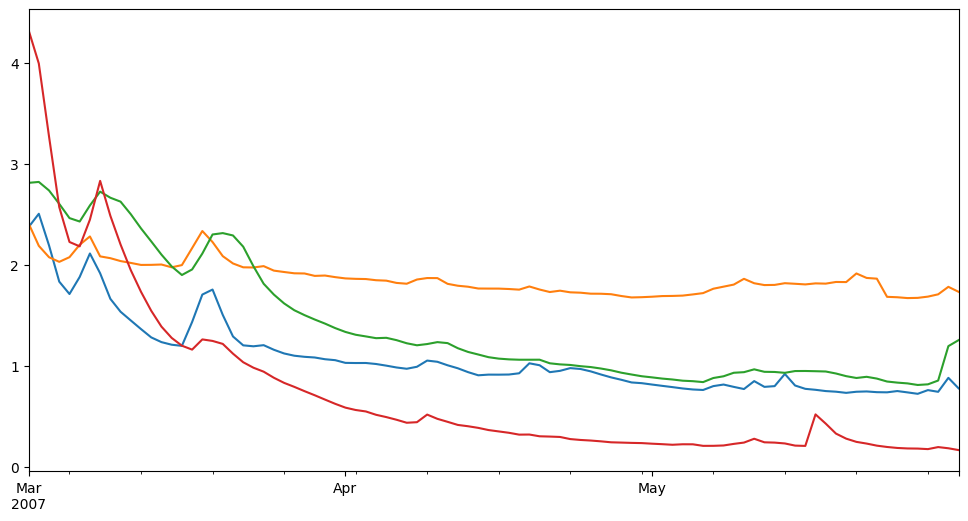

In [146]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

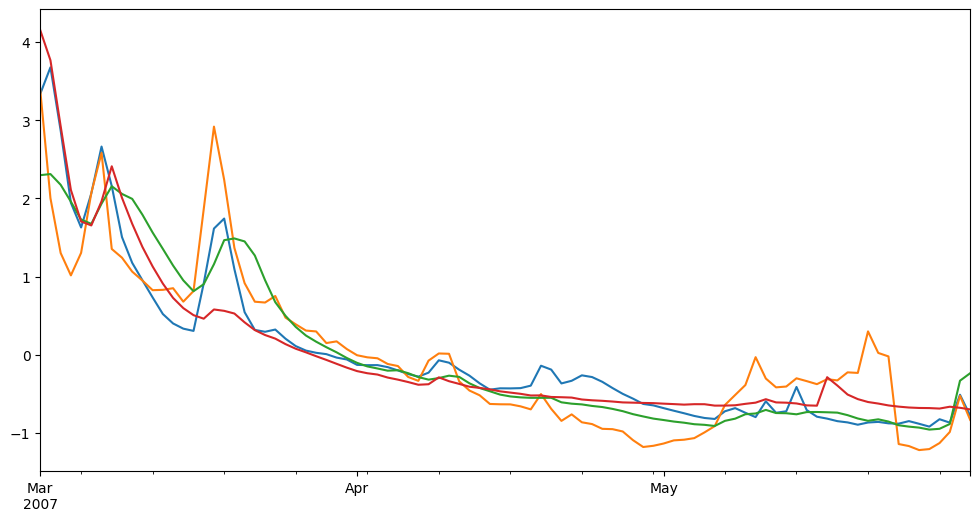

In [147]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

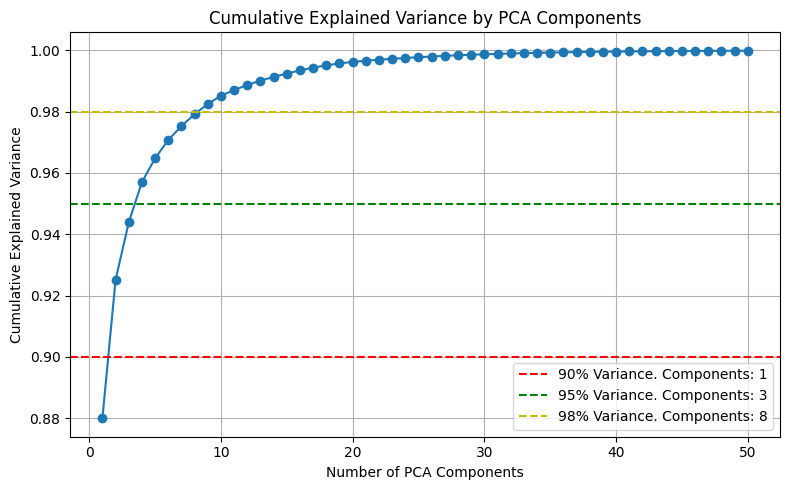

In [148]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [149]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 6.14486716e+01, -2.01822756e+01,  5.09242603e+00, ...,
        -2.54932910e-01,  1.48131432e-01, -1.26640382e-01],
       [ 5.15261935e+01, -1.10061429e+01, -4.25977886e+00, ...,
         8.16460788e-01, -4.38243467e-01,  5.18180934e-01],
       [ 4.05128594e+01, -4.07828578e+00, -7.38221762e+00, ...,
        -7.29867020e-01,  1.30001129e-01, -5.39184475e-01],
       ...,
       [-9.47741363e+00, -2.51367056e+00,  9.87622221e-01, ...,
         6.63451284e-01,  7.47108525e-01, -4.55664635e-02],
       [-5.65526874e+00, -2.22771729e+00,  4.81386438e+00, ...,
        -8.27949210e-01,  2.14620451e-02, -1.81077187e-01],
       [-9.21647317e+00, -1.67817052e+00,  1.17325240e+00, ...,
        -5.01779897e-01, -3.82222782e-01,  5.08679799e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31004\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


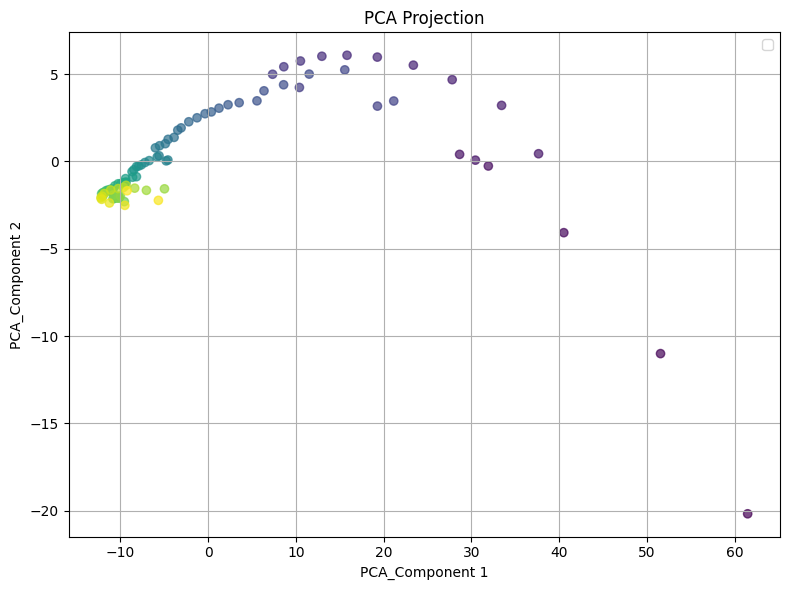

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31004\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


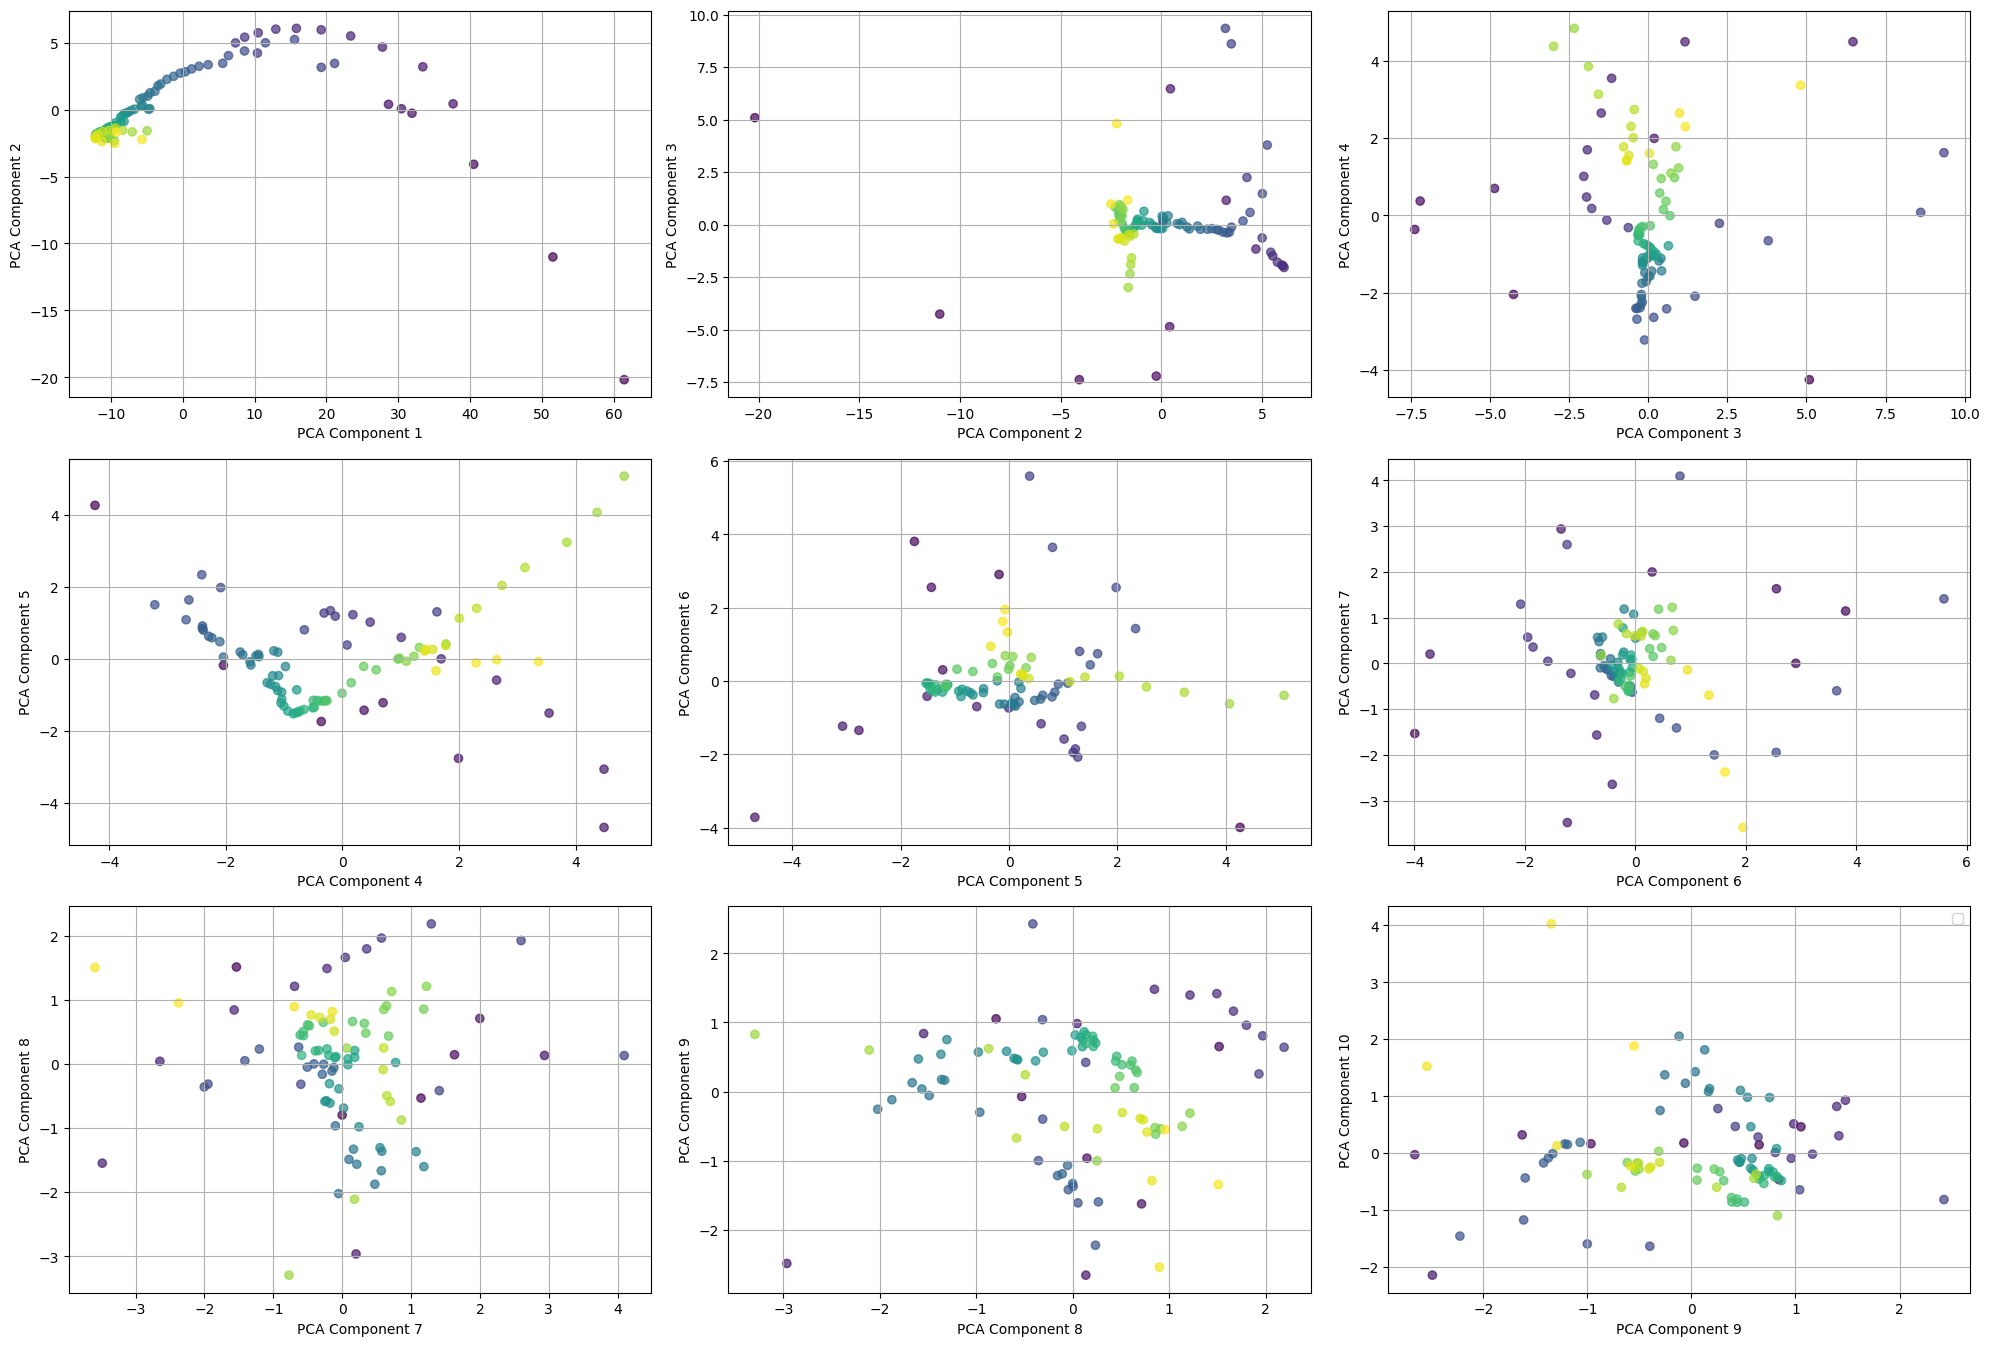

In [151]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [152]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.549
KMeans Davies-Bouldin Index is 0.710


<Axes: xlabel='k'>

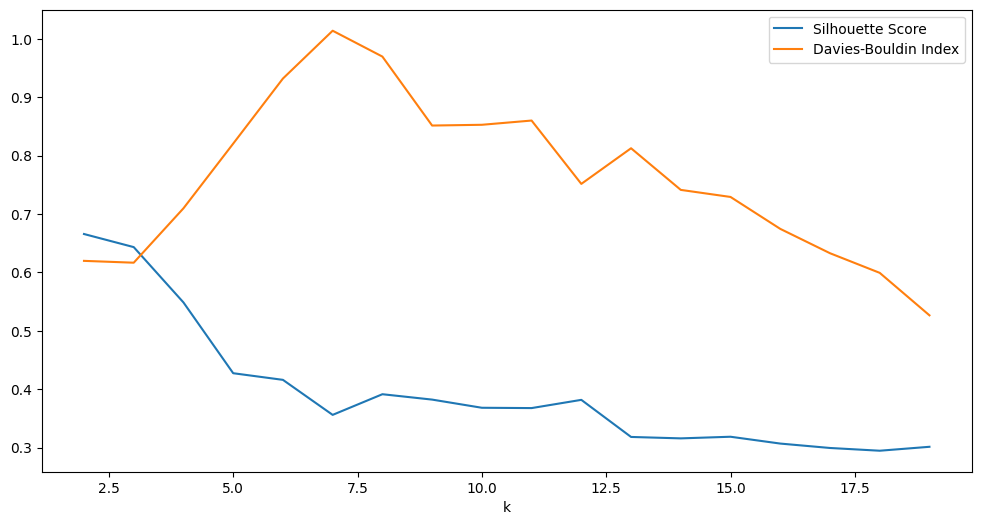

In [153]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         4     76         -0.239985   
1    0.76            3         4     69         -0.151816   
2    1.01            3         3     61         -0.164370   
3    1.27            3         5     49         -0.036318   
4    1.52            3         6     44          0.007999   
5    1.78            3         6     36          0.107818   
6    2.03            3         4     34          0.032358   
7    2.29            3         4     30         -0.079733   
8    2.54            3         3     26          0.015511   
9    2.80            3         3     25          0.029094   
10   3.05            3         3     21          0.369956   
11   3.31            3         3     20          0.371771   
12   3.56            3         2     19          0.402478   
13   3.82            3         2     18          0.424726   
14   4.07            3         2     18          0.424726   
15   4.33            3         2     17          0.443975   
16   4.58            3         2     16          0.463507   
17   4.84            3         2     14          0.494528   
18   5.09            3         2     14          0.494528   
19   5.35            3         2     12          0.525290   
20   5.60            3         2     12          0.525290   
21   5.86            3         2     12          0.525290   
22   6.11            3         2     12          0.525290   
23   6.37            3         1     11               NaN   
24   6.62            3         1     11               NaN   
25   6.88            3         2      7          0.562592   
26   7.13            3         2      7          0.562592   
27   7.39            3         2      6          0.550858   
28   7.64            3         2      6          0.550858   
29   7.90            3         2      6          0.550858   
30   8.15            3         2      6          0.550858   
31   8.41            3         2      6          0.550858   
32   8.66            3         2      6          0.550858   
33   8.92            3         1      6               NaN   
34   9.17            3         1      6               NaN   
35   9.43            3         1      4               NaN   
36   9.68            3         1      4               NaN   
37   9.94            3         1      4               NaN   
38  10.19            3         1      3               NaN   
39  10.45            3         1      2               NaN   
40  10.70            3         1      2               NaN   
41  10.96            3         1      2               NaN   
42  11.21            3         1      2               NaN   
43  11.47            3         1      2               NaN   
44  11.72            3         1      2               NaN   
45  11.98            3         1      2               NaN   
46  12.23            3         1      2               NaN   
47  12.49            3         1      2               NaN   
48  12.74            3         1      2               NaN   
49  13.00            3         1      2               NaN   

    Davies-Bouldin Index  
0               1.205449  
1               1.137250  
2               1.890793  
3               1.459836  
4               1.229841  
5               1.007618  
6               1.121223  
7               1.550141  
8               1.472763  
9               1.561503  
10              1.243929  
11              1.330395  
12              1.347229  
13              1.504548  
14              1.504548  
15              1.303413  
16              1.495452  
17              1.163673  
18              1.163673  
19              1.100253  
20              1.100253  
21              1.100253  
22              1.100253  
23                   NaN  
24                   NaN  
25              1.444167  
26              1.444167  
27              1.419595  
28              1.419595  
29              1.419595  
30              1.419595  
31              1.419595  
32 

<Axes: xlabel='eps'>

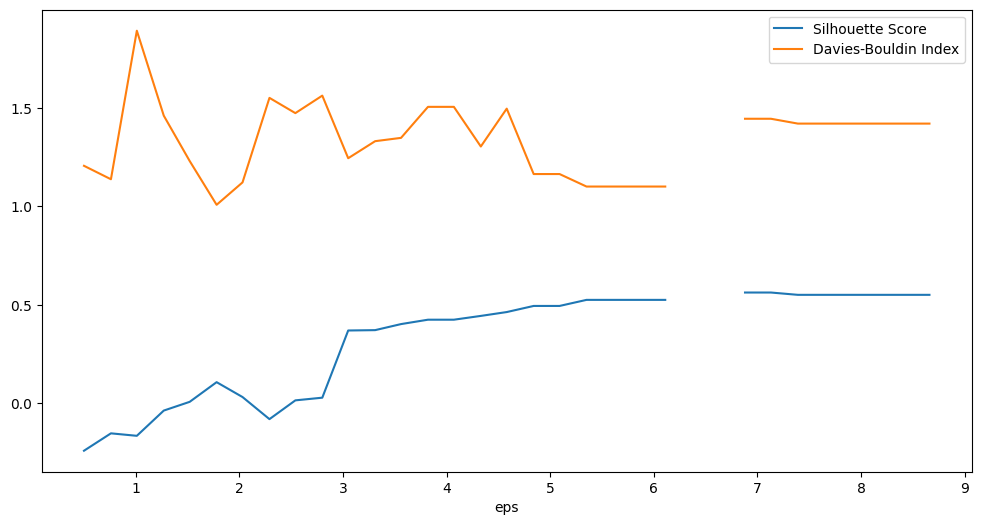

In [154]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

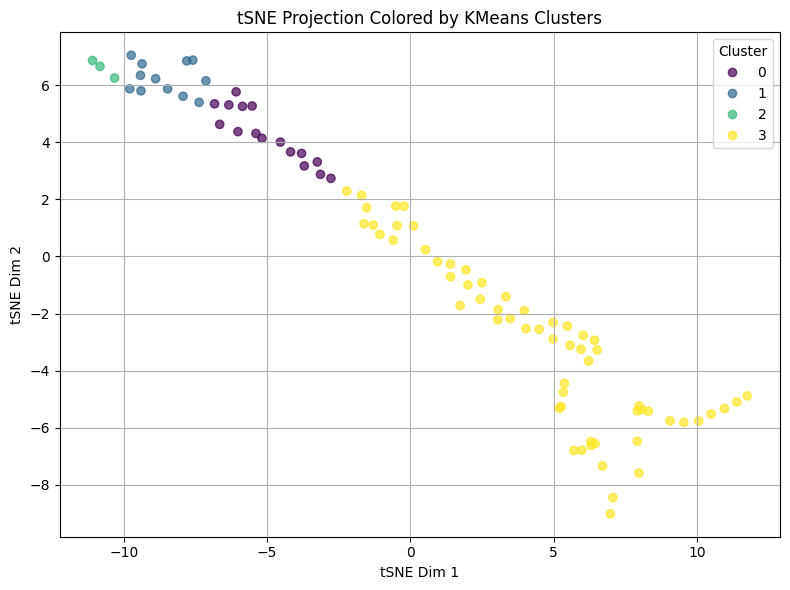

In [155]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        22    229          0.749573   
1    0.05            2        26    219          0.693397   
2    0.06            2        26    213          0.623682   
3    0.06            2        31    199          0.584924   
4    0.07            2        30    195          0.554176   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.775395   
196  0.99            2         2      2          0.775395   
197  0.99            2         2      2          0.775395   
198  1.00            2         2      2          0.775395   
199  1.00            2         2      2          0.775395   

     Davies-Bouldin Index  
0                0.290339  
1                0.342985  
2                0.382634  
3                0.436075  
4                0.510389  
..                    ...  
195              0.233109  
196              0.233109  
197              0.233109  
198              0.233109  
199              0.233109  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

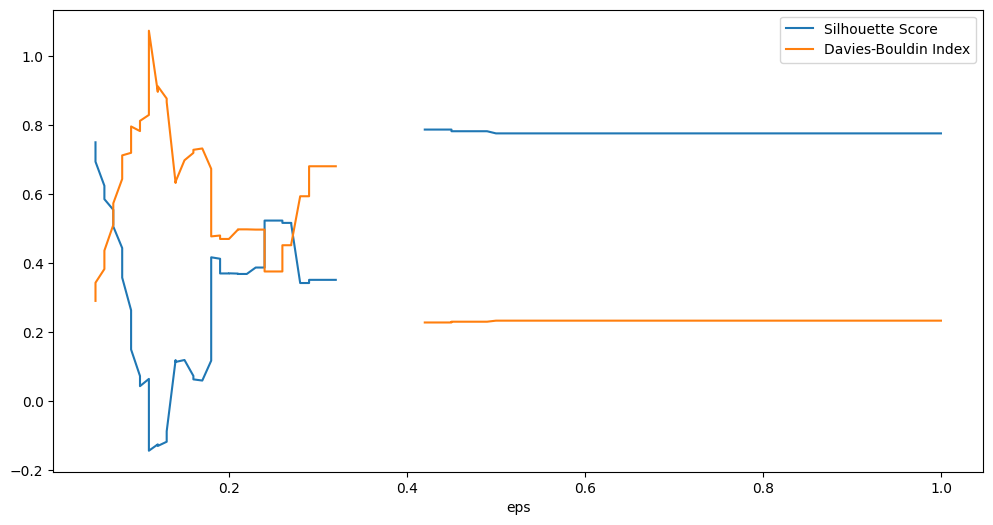

In [156]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [157]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [158]:
#Start with spring and work our way down to winter
season = 2
season_year = 2007
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2007-06-01 to 2007-08-31
Columns: 277 entries, 10000009 to 25000592
dtypes: float64(277)
memory usage: 199.8 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2007-06-01  0.687786  0.698572  0.369369  0.910498  0.699987  0.689087   
2007-06-02  0.671059  0.677200  0.370878  0.899360  0.705454  0.694469   
2007-06-03  0.667707  0.667100  0.363887  0.890527  0.678016  0.667458   
2007-06-04  0.654990  0.648334  0.345408  0.884322  0.640337  0.630366   
2007-06-05  0.676488  0.640712  0.340480  0.884547  0.686636  0.675944   
...              ...       ...       ...       ...       ...       ...   
2007-08-27  0.641479  0.574368  0.518773  0.933734  0.551339  0.542754   
2007-08-28  0.657516  0.583181  0.516217  0.940517  0.538877  0.530485   
2007-08-29  0.673553  0.593246  0.473222  0.931349  0.516795  0.508748   
2007-08-30  0.681571  0.591882  0.461088  0.921090  0.490992  0.483346   
2007-08-31  0.689590  0.586694  0.471898  0.903074  0.520134  0.512034   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-06-01  0.646965  1.004381  

          2007-06-01  2007-06-02  2007-06-03  2007-06-04  2007-06-05  \
10000009   -0.053194   -0.052631   -0.051351   -0.051104   -0.048982   
10000010   -0.052281   -0.052145   -0.051399   -0.051631   -0.051806   
10000011   -0.080156   -0.076374   -0.075386   -0.075614   -0.075512   
10000014   -0.034336   -0.034573   -0.033724   -0.032947   -0.032554   
10000016   -0.052161   -0.049910   -0.050536   -0.052264   -0.048180   
...              ...         ...         ...         ...         ...   
7000003    -0.076614   -0.073860   -0.072102   -0.071196   -0.070486   
8000001    -0.064418   -0.063890   -0.063591   -0.063971   -0.064282   
9000001     0.009517    0.004759    0.005495    0.003820    0.003371   
9000015     0.006154    0.001832    0.002638    0.001216    0.000836   
25000592    0.009631    0.005032    0.006075    0.006337    0.006449   

          2007-06-06  2007-06-07  2007-06-08  2007-06-09  2007-06-10  ...  \
10000009   -0.047076   -0.043306   -0.045819   -0.046309  

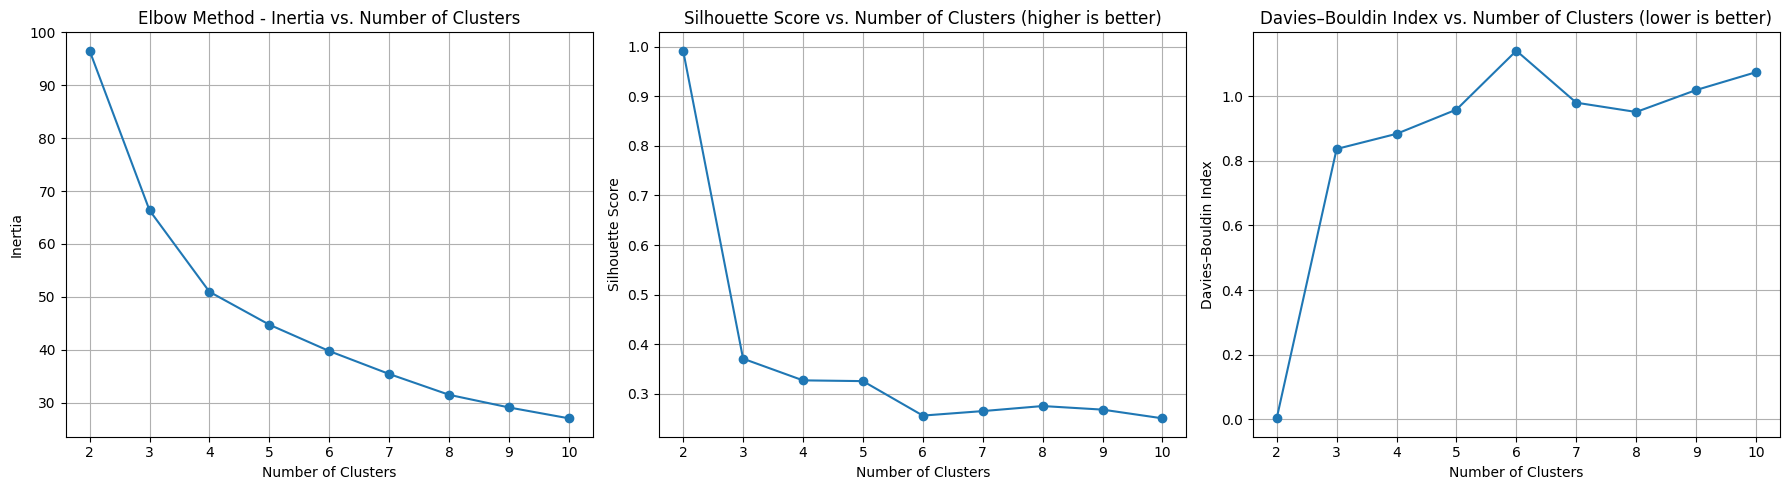

In [159]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2007-06-01  0.687786  0.698572  0.369369  0.910498  0.699987  0.689087   
2007-06-02  0.671059  0.677200  0.370878  0.899360  0.705454  0.694469   
2007-06-03  0.667707  0.667100  0.363887  0.890527  0.678016  0.667458   
2007-06-04  0.654990  0.648334  0.345408  0.884322  0.640337  0.630366   
2007-06-05  0.676488  0.640712  0.340480  0.884547  0.686636  0.675944   
...              ...       ...       ...       ...       ...       ...   
2007-08-27  0.641479  0.574368  0.518773  0.933734  0.551339  0.542754   
2007-08-28  0.657516  0.583181  0.516217  0.940517  0.538877  0.530485   
2007-08-29  0.673553  0.593246  0.473222  0.931349  0.516795  0.508748   
2007-08-30  0.681571  0.591882  0.461088  0.921090  0.490992  0.483346   
2007-08-31  0.689590  0.586694  0.471898  0.903074  0.520134  0.512034   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-06-01  0.646965  1.004381  

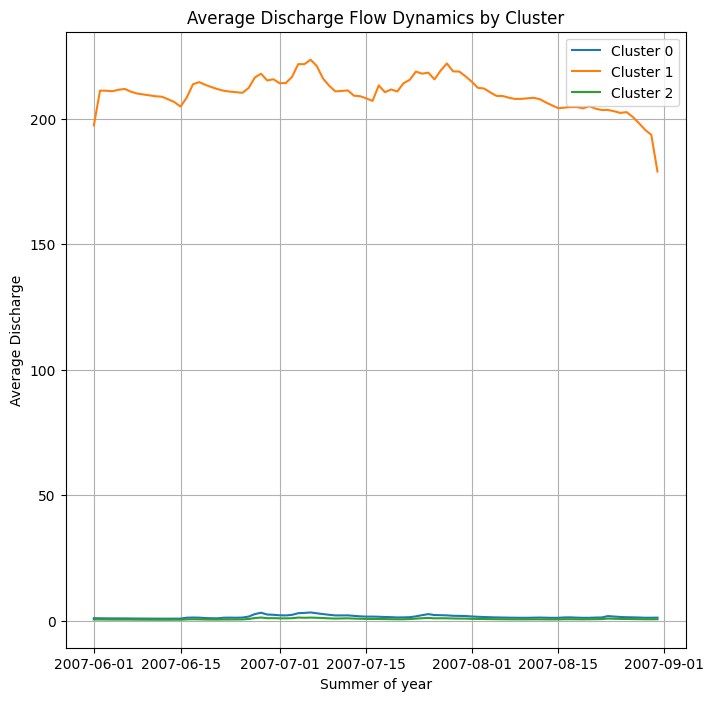

In [160]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [162]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2007-06-01  0.687786  0.698572  0.369369  0.910498  0.699987  0.689087   
2007-06-02  0.671059  0.677200  0.370878  0.899360  0.705454  0.694469   
2007-06-03  0.667707  0.667100  0.363887  0.890527  0.678016  0.667458   
2007-06-04  0.654990  0.648334  0.345408  0.884322  0.640337  0.630366   
2007-06-05  0.676488  0.640712  0.340480  0.884547  0.686636  0.675944   
...              ...       ...       ...       ...       ...       ...   
2007-08-27  0.641479  0.574368  0.518773  0.933734  0.551339  0.542754   
2007-08-28  0.657516  0.583181  0.516217  0.940517  0.538877  0.530485   
2007-08-29  0.673553  0.593246  0.473222  0.931349  0.516795  0.508748   
2007-08-30  0.681571  0.591882  0.461088  0.921090  0.490992  0.483346   
2007-08-31  0.689590  0.586694  0.471898  0.903074  0.520134  0.512034   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-06-01  0.646965  1.004381  0.659873  0.446867  ...  0.207180  0.168533   
2007-06-02  0.644675  0.893873  0.655902  0.438025  ...  0.163759  0.134966   
2007-06-03  0.636239  0.853487  0.646882  0.442257  ...  0.137567  0.135025   
2007-06-04  0.625261  0.827781  0.640381  0.426387  ...  0.118918  0.123886   
2007-06-05  0.614872  0.821108  0.632076  0.438781  ...  0.104688  0.107373   
...              ...       ...       ...       ...  ...       ...       ...   
2007-08-27  0.528213  0.611099  0.539767  0.420341  ...  0.221040  0.195006   
2007-08-28  0.526516  0.601998  0.491813  0.397216  ...  0.197992  0.188482   
2007-08-29  0.516149  0.588762  0.452789  0.365475  ...  0.171191  0.182895   
2007-08-30  0.510395  0.587581  0.441752  0.347790  ...  0.159546  0.177309   
2007-08-31  0.501104  0.594390  0.446026  0.363736  ...  0.177069  0.171722   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2007-06-01  0.101506  0.141749  0.353412  0.411202  0.555233  1.428393   
2007-06-02  0.078523  0.136383  0.340790  0.402667  0.528716  1.396612   
2007-06-03  0.045427  0.145953  0.369719  0.405396  0.512980  1.386279   
2007-06-04  0.042295  0.133501  0.342442  0.401216  0.492470  1.348720   
2007-06-05  0.036287  0.135751  0.316681  0.404135  0.482711  1.339532   
...              ...       ...       ...       ...       ...       ...   
2007-08-27  0.151301  0.127574  0.265059  0.478063  0.514059  0.691193   
2007-08-28  0.143640  0.120487  0.252437  0.516732  0.538216  0.671671   
2007-08-29  0.135979  0.116943  0.227193  0.476761  0.529177  0.635570   
2007-08-30  0.128318  0.113399  0.214572  0.445508  0.514548  0.613160   
2007-08-31  0.120658  0.109855  0.215834  0.432983  0.517767  0.616335   

             9000015  25000592  
2007-06-01  1.388669  1.429740  
2007-06-02  1.359613  1.400068  
2007-06-03  1.350166  1.393620  
2007-06-04  1.315828  1.380517  
2007-06-05  1.307427  1.378516  
...              ...       ...  
2007-08-27  0.714680  1.293210  
2007-08-28  0.696833  1.297419  
2007-08-29  0.663827  1.269954  
2007-08-30  0.643339  1.305011  
2007-08-31  0.646242  1.355494  

[92 rows x 277 columns]

<Axes: >

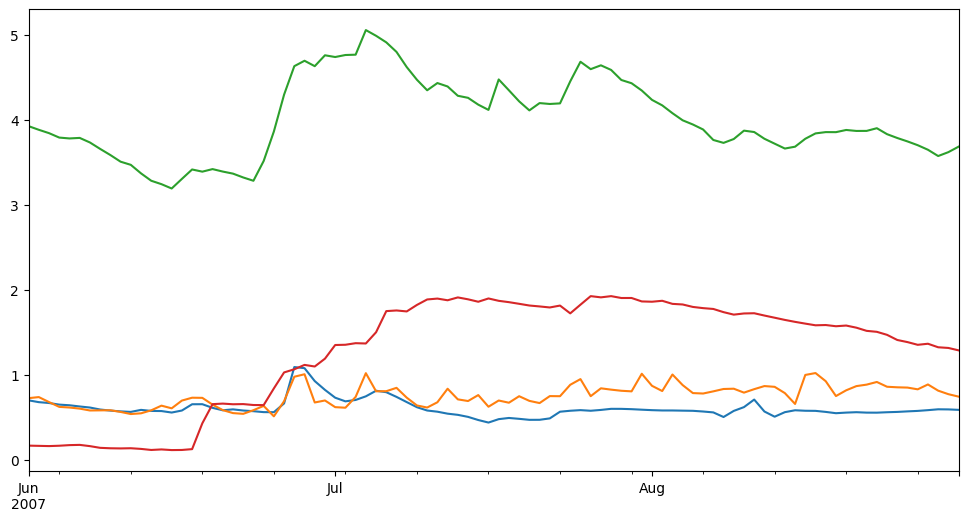

In [163]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

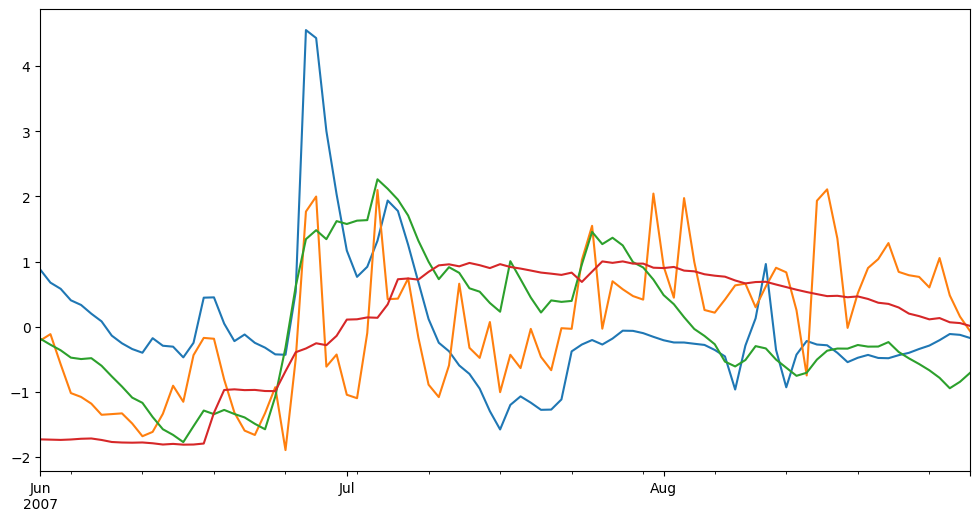

In [164]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

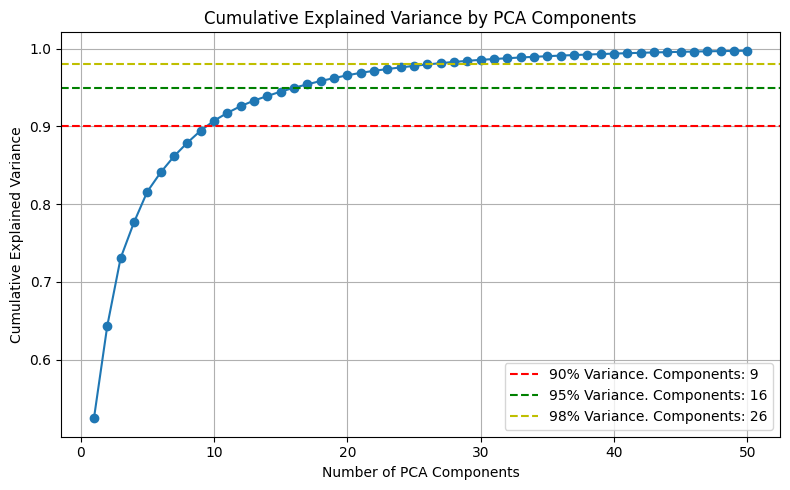

In [165]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [166]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -8.66509351,   5.41827702,  -0.5514355 , ...,  -1.84637716,
          0.21496758,  -0.6168363 ],
       [ -9.93097958,   5.26435305,  -0.95952435, ...,  -1.23681455,
          0.36376921,  -0.418789  ],
       [-10.83230427,   5.19132775,  -1.09679056, ...,  -0.86422654,
          0.41574547,  -0.46751827],
       ...,
       [ -6.56140153,  -2.69991268,   5.55709708, ...,  -0.24555446,
          0.11662385,   0.11811081],
       [ -6.88905812,  -2.29507245,   5.56381044, ...,  -1.02042995,
         -0.15514099,  -0.27414056],
       [ -5.37018322,  -1.57709343,   6.46409987, ...,  -2.30552139,
          0.68457473,   0.04800812]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31004\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


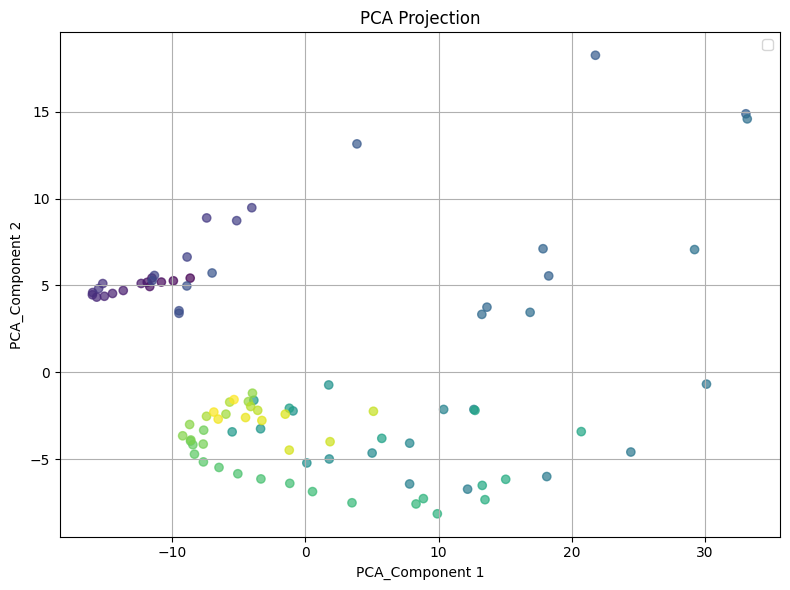

In [167]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31004\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


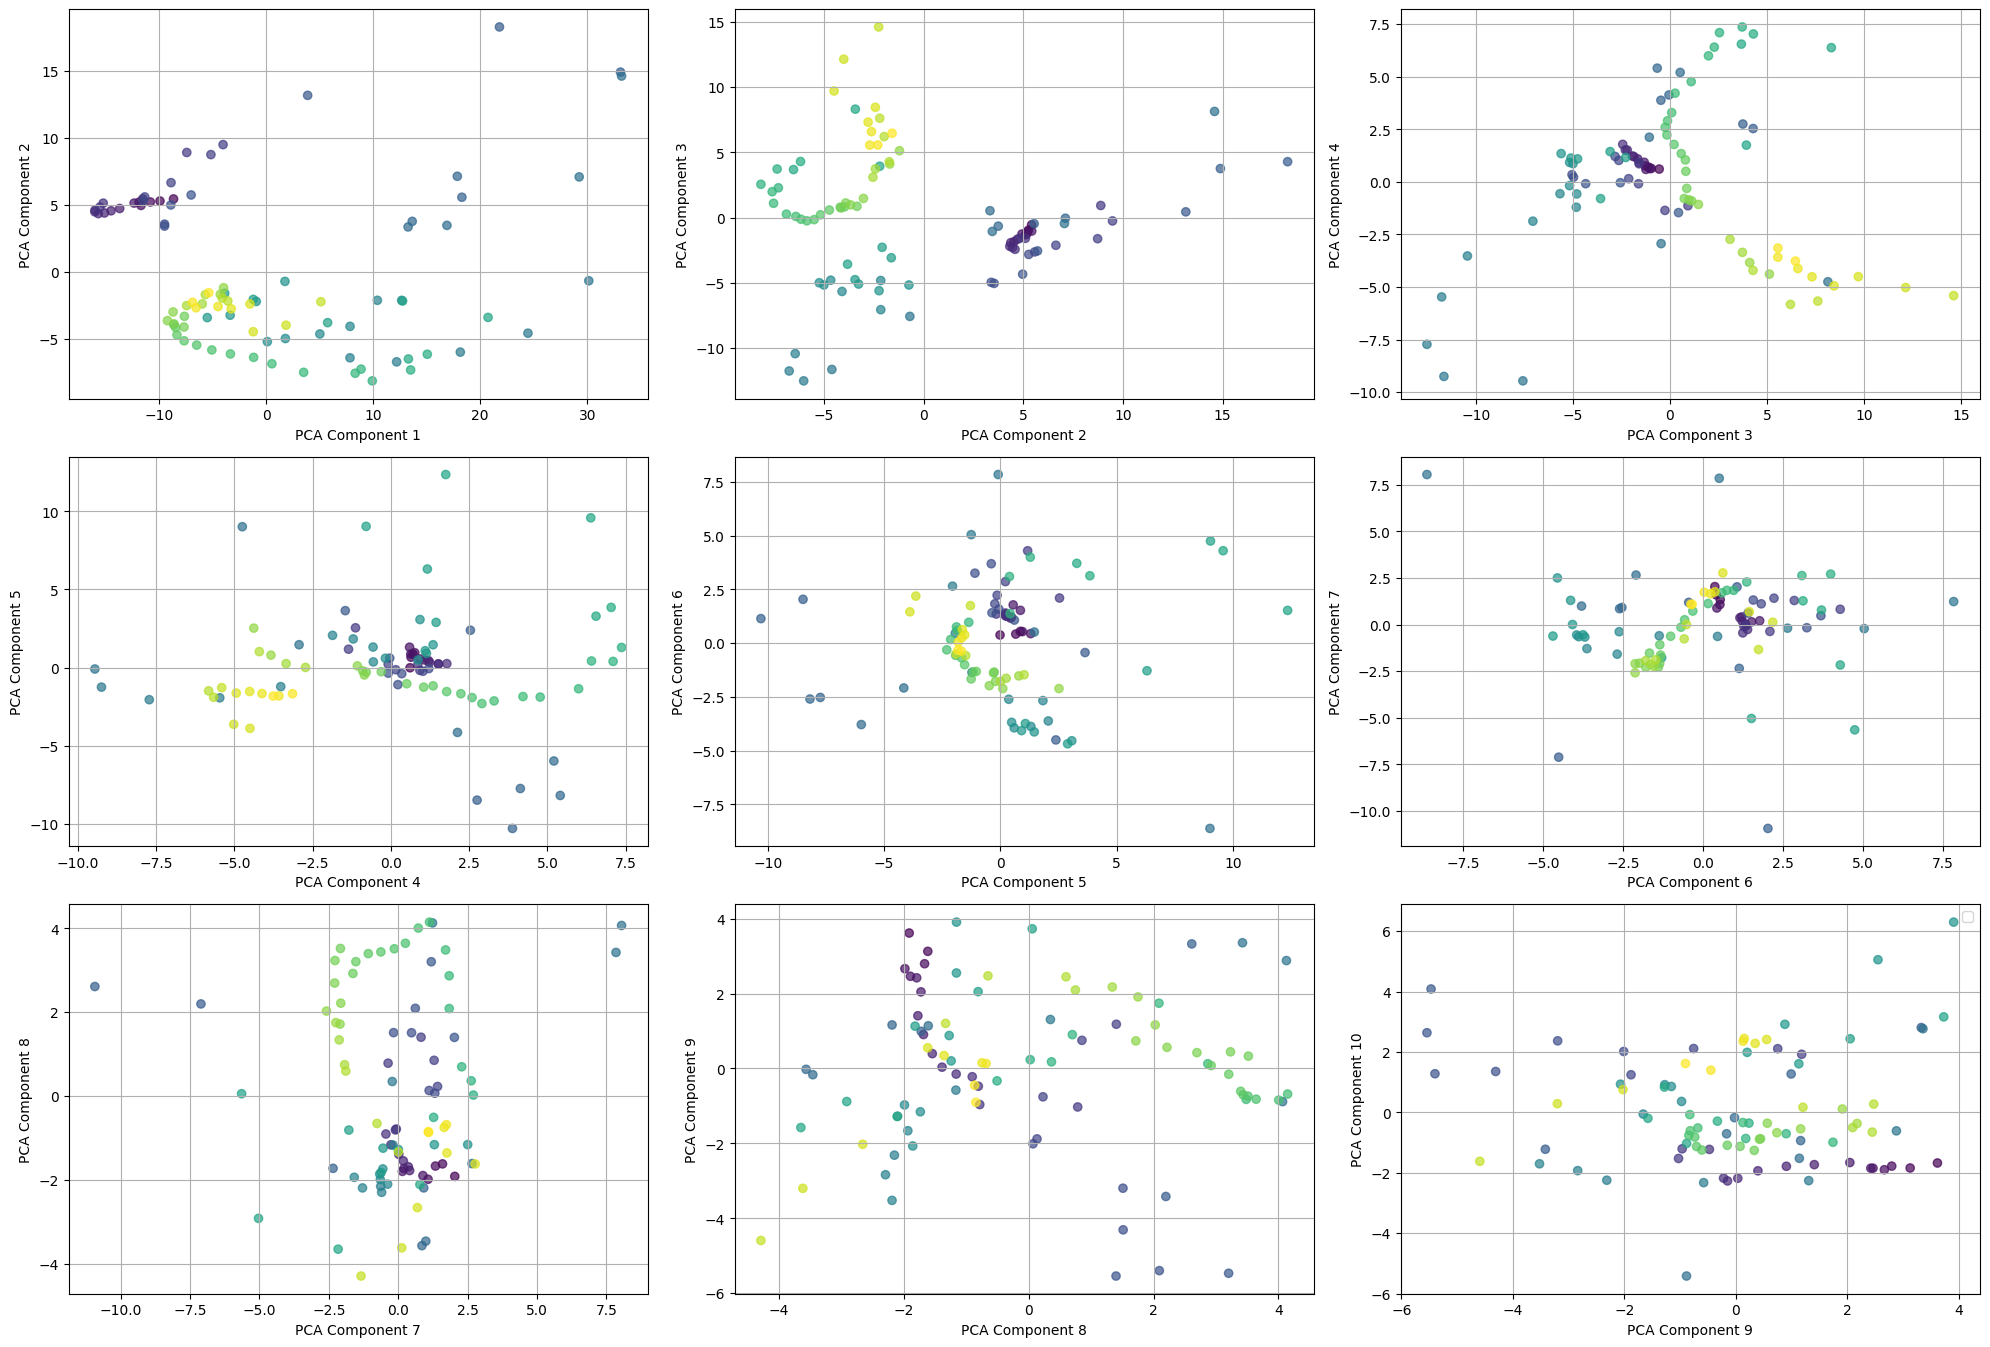

In [168]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [169]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.297
KMeans Davies-Bouldin Index is 1.310


<Axes: xlabel='k'>

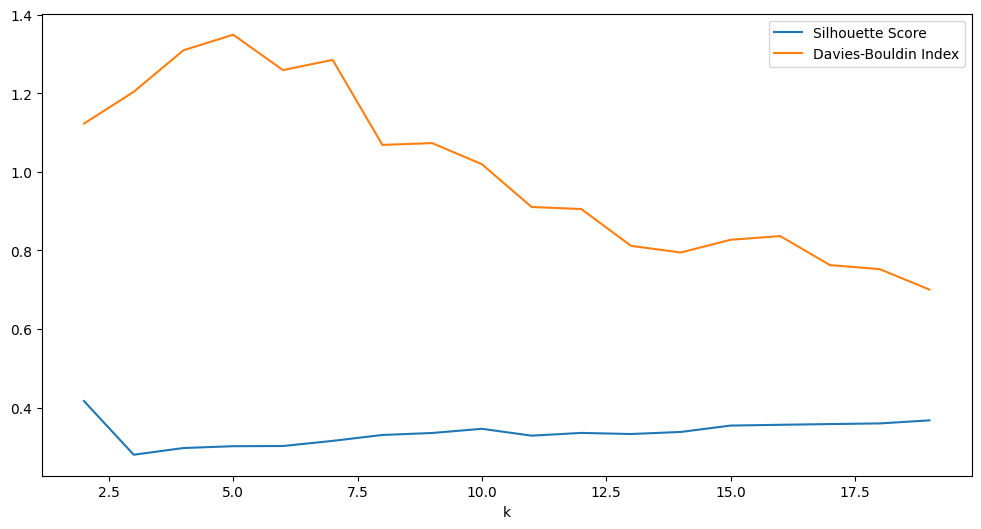

In [170]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         1     89               NaN   
3    1.27            3         2     83         -0.180473   
4    1.52            3         4     74         -0.108085   
5    1.78            3         4     72         -0.087843   
6    2.03            3         4     69         -0.050359   
7    2.29            3         2     65          0.061819   
8    2.54            3         3     60          0.037298   
9    2.80            3         4     56          0.074374   
10   3.05            3         4     55          0.088535   
11   3.31            3         4     54          0.108291   
12   3.56            3         5     51          0.057720   
13   3.82            3         7     42          0.105175   
14   4.07            3         8     39          0.133754   
15   4.33            3         7     37          0.124124   
16   4.58            3         8     32          0.144551   
17   4.84            3         8     32          0.144551   
18   5.09            3         8     32          0.144551   
19   5.35            3         8     28          0.202594   
20   5.60            3         8     28          0.202594   
21   5.86            3         8     28          0.202594   
22   6.11            3         6     26          0.103376   
23   6.37            3         6     24          0.110478   
24   6.62            3         4     24          0.172743   
25   6.88            3         5     18          0.209163   
26   7.13            3         4     17          0.220247   
27   7.39            3         5     14          0.229182   
28   7.64            3         5     12          0.241221   
29   7.90            3         5     12          0.241221   
30   8.15            3         4     10          0.252541   
31   8.41            3         4     10          0.252541   
32   8.66            3         4     10          0.252541   
33   8.92            3         4      9          0.264719   
34   9.17            3         4      9          0.264719   
35   9.43            3         4      9          0.264719   
36   9.68            3         3      9          0.213505   
37   9.94            3         3      9          0.213505   
38  10.19            3         3      9          0.213505   
39  10.45            3         3      9          0.213505   
40  10.70            3         3      9          0.213505   
41  10.96            3         3      9          0.213505   
42  11.21            3         3      9          0.213505   
43  11.47            3         3      9          0.213505   
44  11.72            3         2      9          0.298182   
45  11.98            3         2      9          0.298182   
46  12.23            3         2      9          0.298182   
47  12.49            3         2      8          0.287541   
48  12.74            3         2      7          0.290599   
49  13.00            3         2      7          0.290599   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.217665  
4               1.180523  
5               1.185496  
6               1.168785  
7               1.274087  
8               1.344230  
9               1.291393  
10              1.278695  
11              1.278474  
12              1.473625  
13              1.210457  
14              1.144274  
15              1.196997  
16              1.275122  
17              1.275122  
18              1.275122  
19              1.271583  
20              1.271583  
21              1.271583  
22              1.296926  
23              1.409055  
24              1.484454  
25              1.630565  
26              1.645828  
27              1.579617  
28              1.534760  
29              1.534760  
30              1.557577  
31              1.557577  
32 

<Axes: xlabel='eps'>

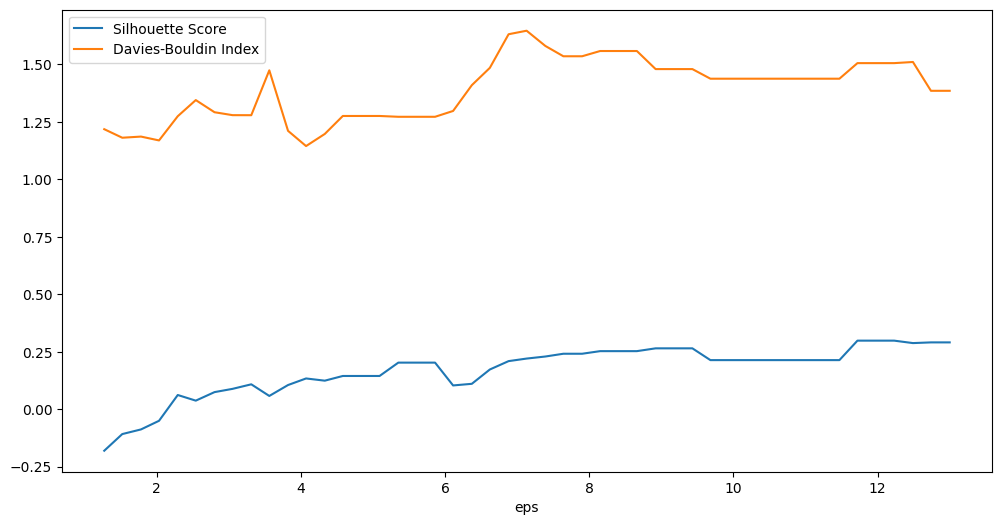

In [171]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

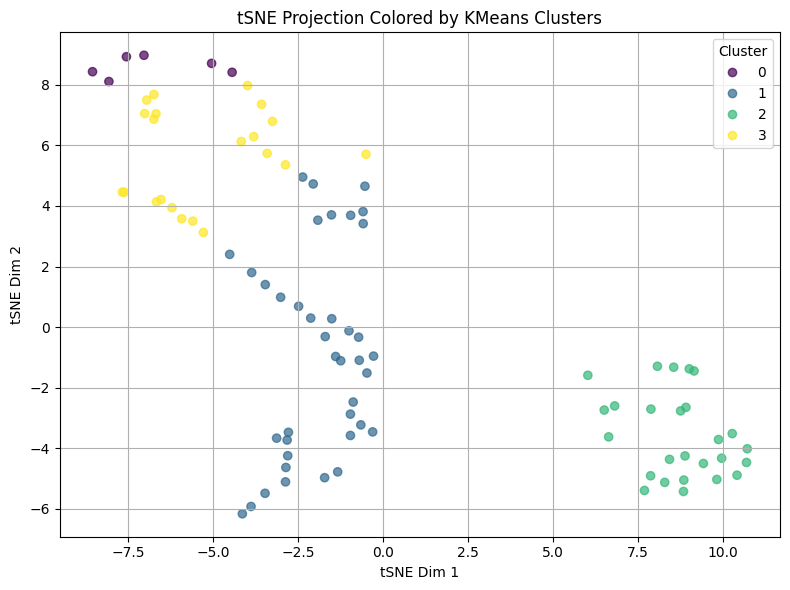

In [172]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        19    196          0.340252              0.509298
1   0.07            2        18    153         -0.041659              0.769509
2   0.09            2        19    115          0.036648              0.684190
3   0.11            2        19     88          0.119034              0.718460
4   0.13            2        14     65          0.028813              0.766498
5   0.15            2        10     55          0.041692              0.738146
6   0.17            2        10     38          0.102847              0.636256
7   0.19            2         9     29          0.114488              0.680655
8   0.21            2         7     27          0.121164              0.694692
9   0.22            2         7     24          0.115242              0.698964
10  0.24            2         5     22          0.242156              0.721707
11  0.26            2         3     20          0.274150              0.910632
12  0.28            2         2     18          0.372975              0.586701
13  0.30            2         1     14               NaN                   NaN
14  0.32            2         1     14               NaN                   NaN
15  0.34            2         1     14               NaN                   NaN
16  0.36            2         1     14               NaN                   NaN
17  0.38            2         1     12               NaN                   NaN
18  0.40            2         1     11               NaN                   NaN
19  0.42            2         1     10               NaN                   NaN
20  0.44            2         1     10               NaN                   NaN
21  0.46            2         1     10               NaN                   NaN
22  0.48            2         1     10               NaN                   NaN
23  0.50            2         1     10               NaN                   NaN
24  0.52            2         2      8          0.650346              0.400885
25  0.53            2         2      8          0.650346              0.400885
26  0.55            2         2      8          0.650346              0.400885
27  0.57            2         2      7          0.621760              0.530120
28  0.59            2         2      5          0.732433              0.317204
29  0.61            2         2      5          0.732433              0.317204
30  0.63            2         2      5          0.732433              0.317204
31  0.65            2         2      5          0.732433              0.317204
32  0.67            2         2      5          0.732433              0.317204
33  0.69            2         2      5          0.732433              0.317204
34  0.71            2         1      5               NaN                   NaN
35  0.73            2         1      5               NaN                   NaN
36  0.75            2         1      5               NaN                   NaN
37  0.77            2         1      4               NaN                   NaN
38  0.79            2         1      4               NaN                   NaN
39  0.81            2         1      4               NaN                   NaN
40  0.83            2         1      4               NaN                   NaN
41  0.84            2         1      4               NaN                   NaN
42  0.86            2         1      4               NaN                   NaN
43  0.88            2         1      4               NaN                   NaN
44  0.90            2         1      4               NaN                   NaN
45  0.92            2         2      2          0.666003              0.502604
46  0.94            2         2      2          0.666003              0.502604
47  0.96            2         1      2               NaN                   NaN
48  0.98            2         1      2               NaN                   NaN
49  1.00            2         1      2               Na

<Axes: xlabel='eps'>

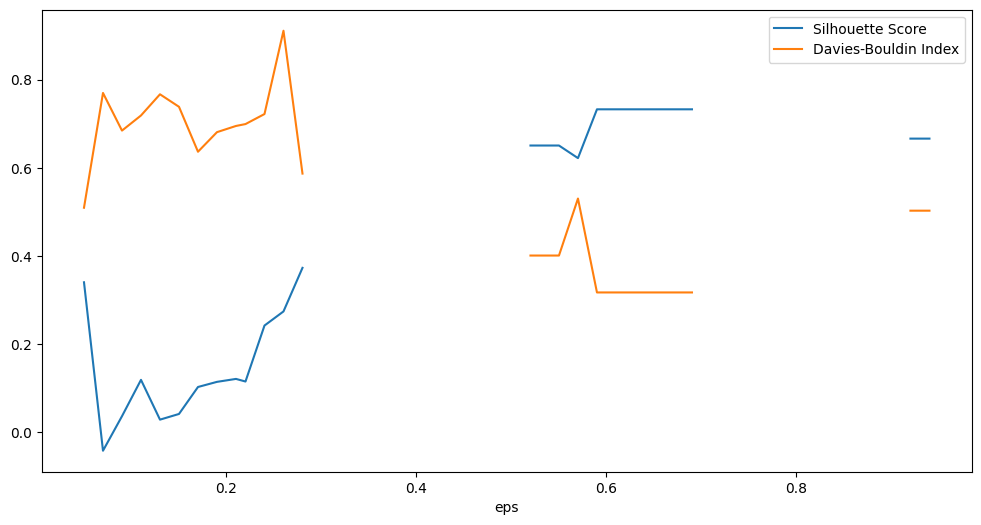

In [173]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [174]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [175]:
#Start with spring and work our way down to winter
season = 3
season_year = 2007
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2007-09-01 to 2007-11-30
Columns: 279 entries, 10000009 to 25000592
dtypes: float64(279)
memory usage: 199.1 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2007-09-01  0.649497  0.586150  0.483109  0.885626  0.541832  0.533395   
2007-09-02  0.761756  0.581558  0.495305  0.883399  0.547026  0.538507   
2007-09-03  0.917002  0.572227  0.555917  0.870930  0.559389  0.550678   
2007-09-04  0.801849  0.557673  0.484094  1.071896  0.518010  0.509944   
2007-09-05  0.753738  0.542991  0.479998  0.927460  0.512880  0.504893   
...              ...       ...       ...       ...       ...       ...   
2007-11-26  0.977437  0.699375  0.493642  0.877352  0.510125  0.502182   
2007-11-27  0.841524  0.615775  0.475809  0.804447  0.450076  0.443068   
2007-11-28  0.782933  0.581420  0.432137  0.785365  0.451274  0.444247   
2007-11-29  0.857008  0.624976  0.424067  0.839558  0.501379  0.493571   
2007-11-30  0.976090  0.695629  0.439898  0.898454  0.520764  0.512655   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-09-01  0.500856  0.608401  

          2007-09-01  2007-09-02  2007-09-03  2007-09-04  2007-09-05  \
10000009   -0.070553   -0.059142   -0.050672   -0.054079   -0.053058   
10000010   -0.076802   -0.076394   -0.082904   -0.077276   -0.073147   
10000011   -0.086965   -0.084651   -0.084429   -0.084266   -0.079151   
10000014   -0.047263   -0.047496   -0.054980   -0.028425   -0.036498   
10000016   -0.081173   -0.079700   -0.084104   -0.081044   -0.076017   
...              ...         ...         ...         ...         ...   
7000003    -0.090616   -0.090332   -0.096600   -0.093352   -0.090467   
8000001    -0.082877   -0.082069   -0.086735   -0.082222   -0.077973   
9000001    -0.071121   -0.069496   -0.075683   -0.070734   -0.067374   
9000015    -0.068403   -0.066939   -0.073153   -0.067976   -0.064419   
25000592   -0.004159   -0.005430   -0.007168   -0.007550   -0.004589   

          2007-09-06  2007-09-07  2007-09-08  2007-09-09  2007-09-10  ...  \
10000009   -0.061994   -0.059672   -0.057819   -0.056808  

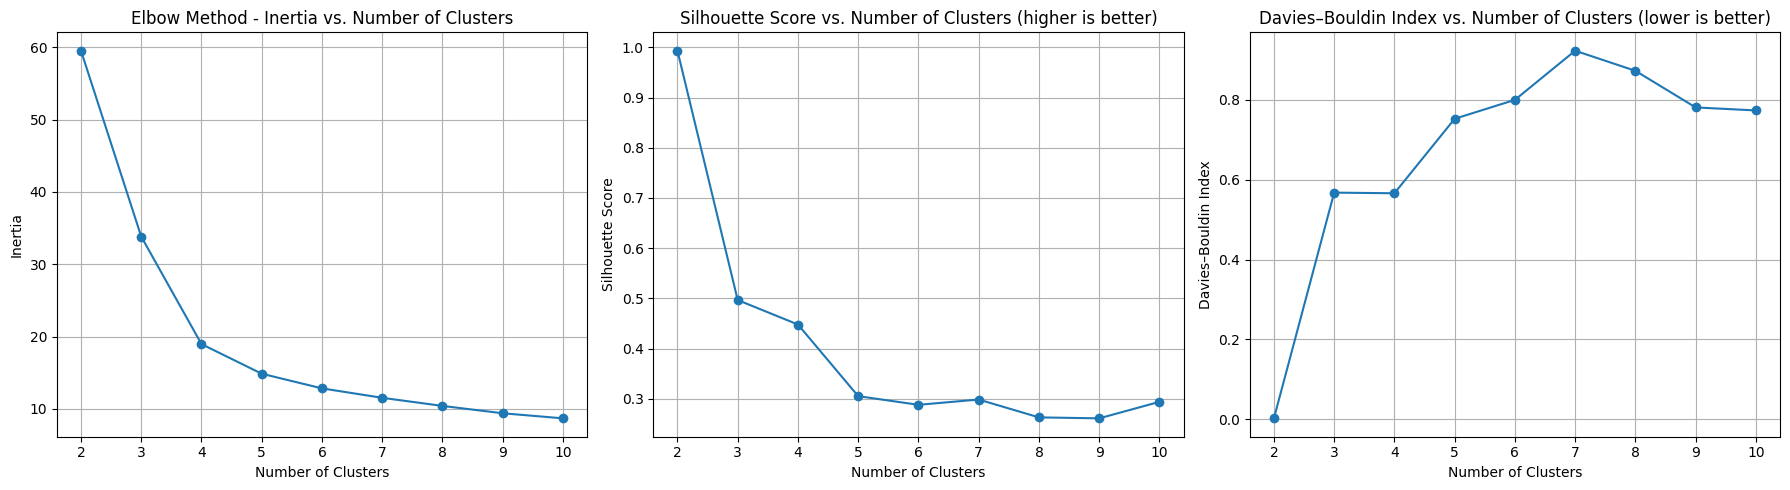

In [176]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2007-09-01  0.649497  0.586150  0.483109  0.885626  0.541832  0.533395   
2007-09-02  0.761756  0.581558  0.495305  0.883399  0.547026  0.538507   
2007-09-03  0.917002  0.572227  0.555917  0.870930  0.559389  0.550678   
2007-09-04  0.801849  0.557673  0.484094  1.071896  0.518010  0.509944   
2007-09-05  0.753738  0.542991  0.479998  0.927460  0.512880  0.504893   
...              ...       ...       ...       ...       ...       ...   
2007-11-26  0.977437  0.699375  0.493642  0.877352  0.510125  0.502182   
2007-11-27  0.841524  0.615775  0.475809  0.804447  0.450076  0.443068   
2007-11-28  0.782933  0.581420  0.432137  0.785365  0.451274  0.444247   
2007-11-29  0.857008  0.624976  0.424067  0.839558  0.501379  0.493571   
2007-11-30  0.976090  0.695629  0.439898  0.898454  0.520764  0.512655   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-09-01  0.500856  0.608401  

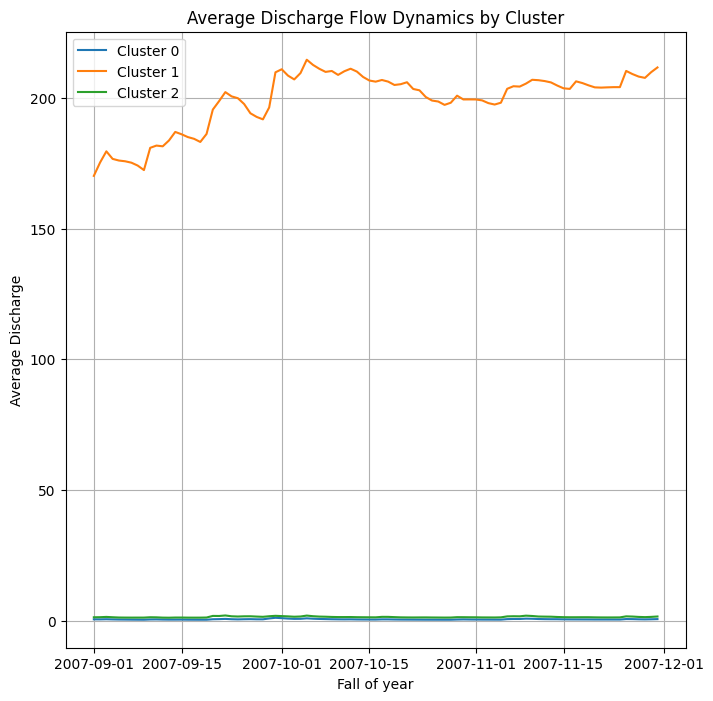

In [177]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [178]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [179]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2007-09-01  0.649497  0.586150  0.483109  0.885626  0.541832  0.533395   
2007-09-02  0.761756  0.581558  0.495305  0.883399  0.547026  0.538507   
2007-09-03  0.917002  0.572227  0.555917  0.870930  0.559389  0.550678   
2007-09-04  0.801849  0.557673  0.484094  1.071896  0.518010  0.509944   
2007-09-05  0.753738  0.542991  0.479998  0.927460  0.512880  0.504893   
...              ...       ...       ...       ...       ...       ...   
2007-11-26  0.977437  0.699375  0.493642  0.877352  0.510125  0.502182   
2007-11-27  0.841524  0.615775  0.475809  0.804447  0.450076  0.443068   
2007-11-28  0.782933  0.581420  0.432137  0.785365  0.451274  0.444247   
2007-11-29  0.857008  0.624976  0.424067  0.839558  0.501379  0.493571   
2007-11-30  0.976090  0.695629  0.439898  0.898454  0.520764  0.512655   

            11000011  11000016  12000001  13000011  ...  64000025  66000014  \
2007-09-01  0.500856  0.608401  0.487234  0.381496  ...  0.298453  0.165198   
2007-09-02  0.496851  0.613031  0.482804  0.434776  ...  0.296880  0.159611   
2007-09-03  0.498196  0.614084  0.496713  0.465383  ...  0.315571  0.154024   
2007-09-04  0.507992  0.599978  0.451875  0.415656  ...  0.330630  0.148438   
2007-09-05  0.492183  0.589066  0.470926  0.400012  ...  0.277039  0.146364   
...              ...       ...       ...       ...  ...       ...       ...   
2007-11-26  0.664301  0.952492  0.601982  0.580784  ...  0.554876  0.607962   
2007-11-27  0.657285  0.840155  0.556203  0.520250  ...  0.166998  0.552802   
2007-11-28  0.654468  0.804487  0.541189  0.502414  ...  0.127046  0.498182   
2007-11-29  0.666216  0.895589  0.576879  0.587812  ...  0.137561  0.471641   
2007-11-30  0.703544  1.211293  0.669403  0.653033  ...  0.153149  0.536436   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2007-09-01  0.112997  0.102768  0.189328  0.446097  0.524553  0.643743   
2007-09-02  0.105336  0.099224  0.189328  0.435961  0.522272  0.653608   
2007-09-03  0.097675  0.095681  0.177968  0.425717  0.531244  0.649469   
2007-09-04  0.090014  0.092137  0.176706  0.388442  0.505610  0.626538   
2007-09-05  0.082354  0.101877  0.176706  0.361287  0.492363  0.603555   
...              ...       ...       ...       ...       ...       ...   
2007-11-26  0.463479  0.972618  0.648006  1.017273  0.910255  1.045699   
2007-11-27  0.423259  0.856348  0.602946  0.795456  0.820605  0.983074   
2007-11-28  0.384955  0.737723  0.560032  0.673031  0.748920  0.915036   
2007-11-29  0.354312  0.707689  0.525700  0.771941  0.786858  1.054730   
2007-11-30  0.404107  0.838416  0.581489  1.137898  0.883227  1.249578   

             9000015  25000592  
2007-09-01  0.671299  1.322618  
2007-09-02  0.680318  1.322796  
2007-09-03  0.676535  1.382363  
2007-09-04  0.655570  1.291639  
2007-09-05  0.634558  1.262212  
...              ...       ...  
2007-11-26  1.038789  1.262855  
2007-11-27  0.981534  1.201394  
2007-11-28  0.919330  1.183198  
2007-11-29  1.047046  1.271269  
2007-11-30  1.225187  1.361436  

[91 rows x 279 columns]

<Axes: >

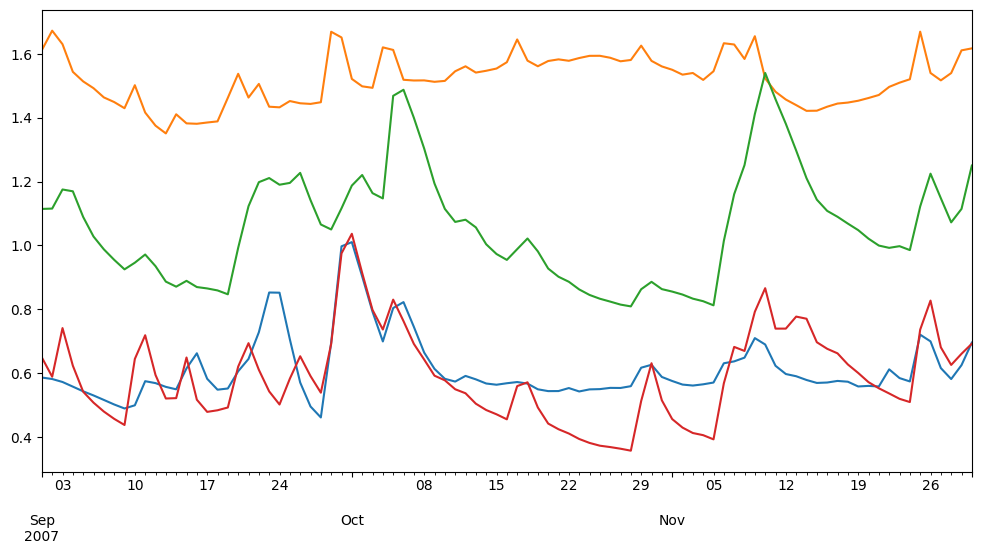

In [180]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

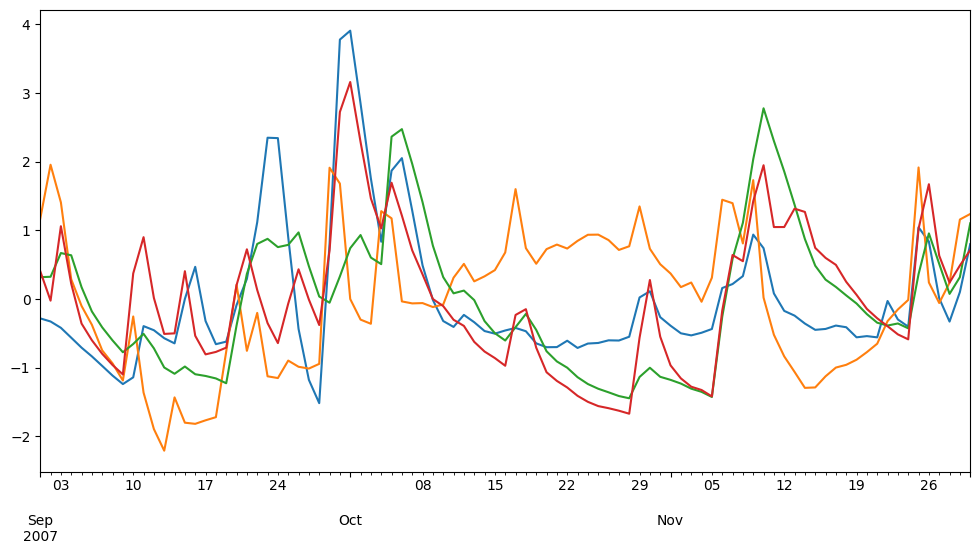

In [181]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

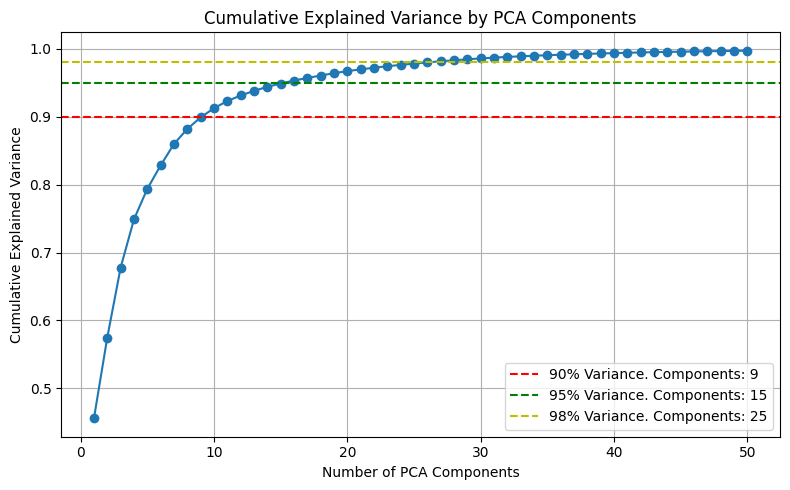

In [182]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [183]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-3.52753797, 14.05566865,  4.71354626, ..., -0.1787414 ,
        -0.23847649,  0.58607884],
       [-3.76792525, 12.70806434,  4.10245807, ...,  0.18609084,
        -0.0306651 ,  0.31784491],
       [ 1.58441594, 13.92571028,  5.22570669, ..., -0.09390765,
        -0.25243833,  1.2571334 ],
       ...,
       [-2.0459687 , -3.9517291 ,  6.24688354, ...,  0.04501962,
         0.1694229 , -0.31939397],
       [ 1.86946728, -4.08241405,  7.42348402, ..., -0.22271803,
        -0.55155931, -0.45417463],
       [ 7.47739252, -3.42902398,  9.17670916, ..., -1.11007654,
        -0.71045786, -0.09851835]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31004\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


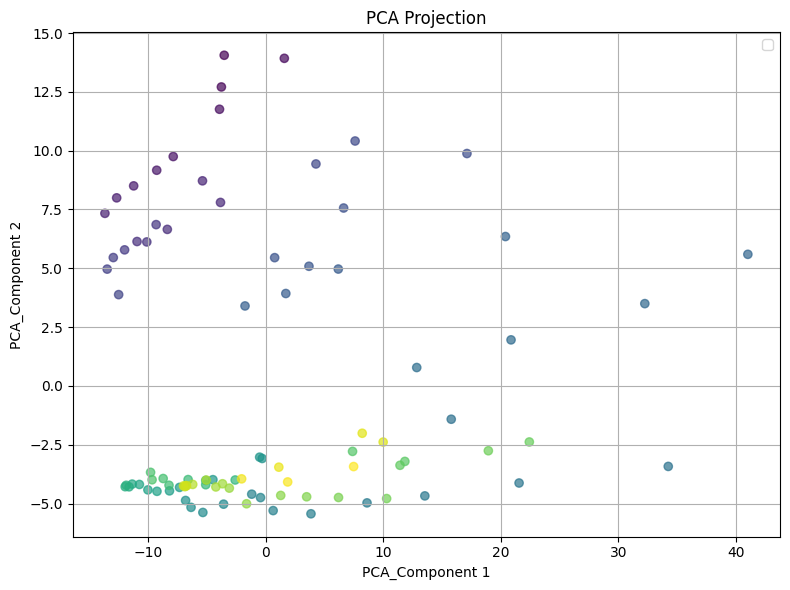

In [184]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31004\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


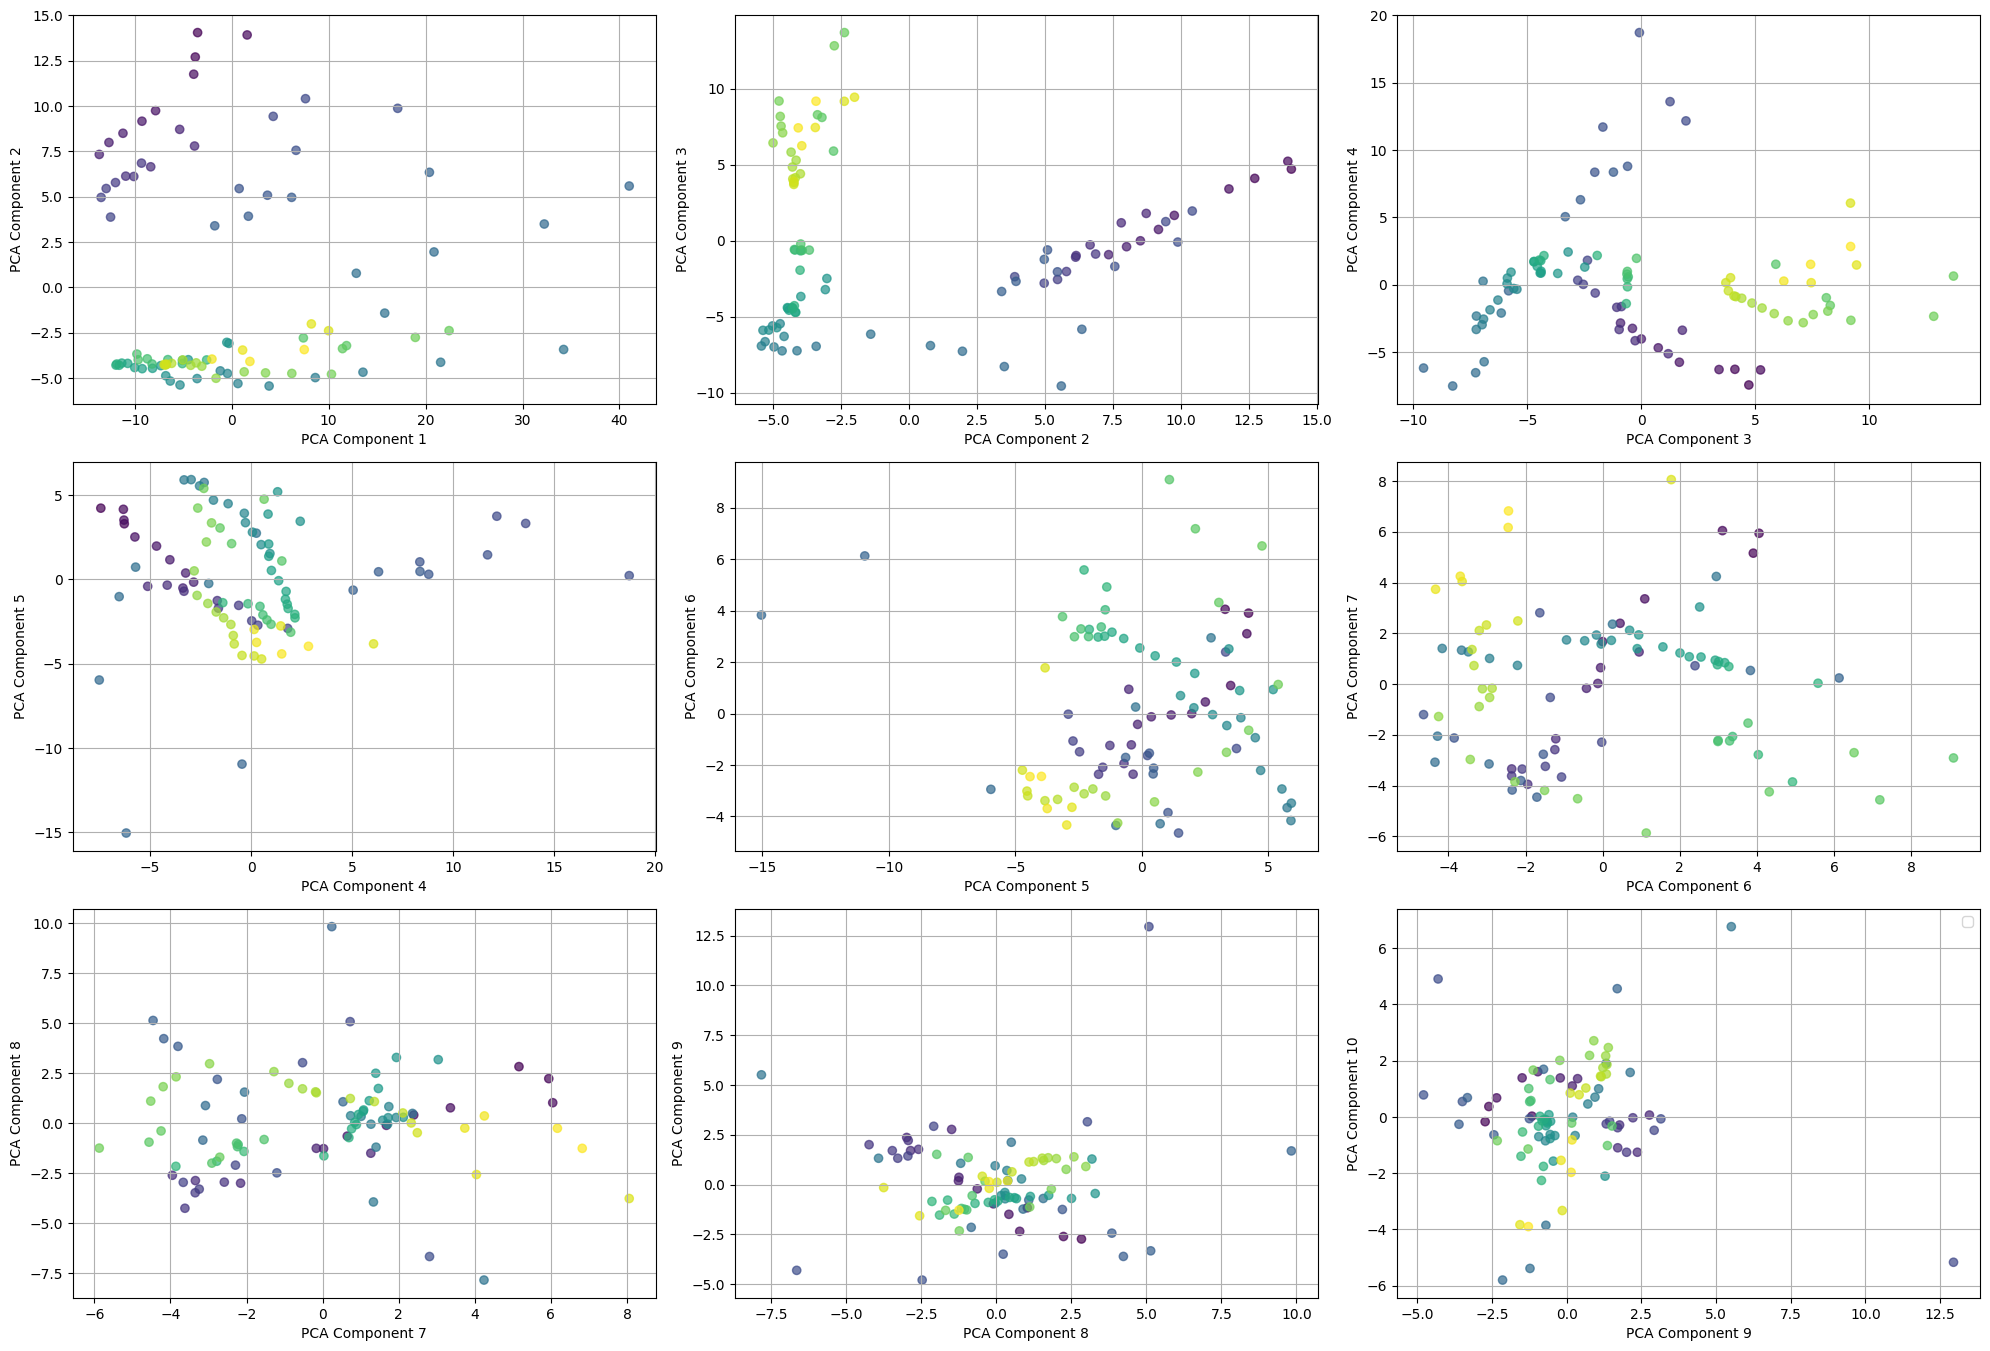

In [185]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [186]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.275
KMeans Davies-Bouldin Index is 1.345


<Axes: xlabel='k'>

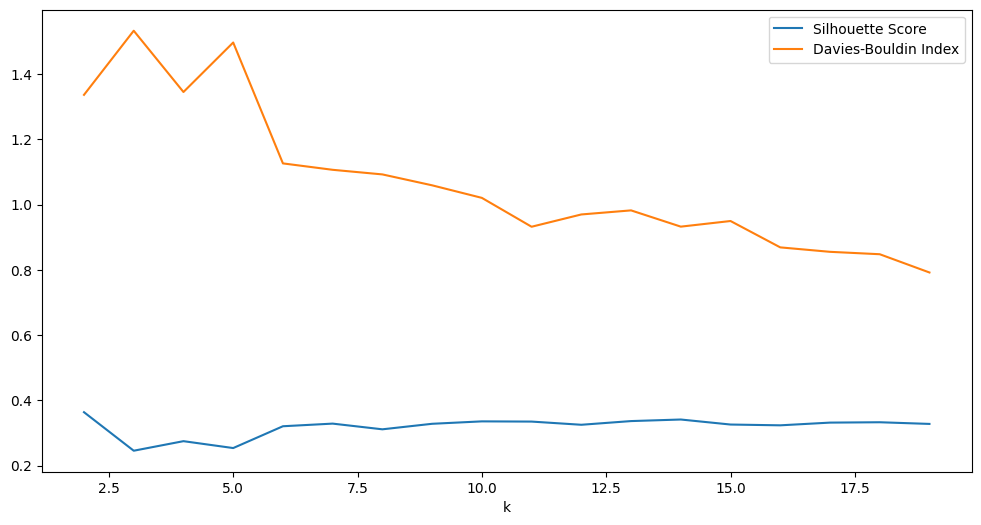

In [187]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         1     88               NaN   
3    1.27            3         1     86               NaN   
4    1.52            3         4     76         -0.135728   
5    1.78            3         5     69         -0.062512   
6    2.03            3         5     67         -0.052381   
7    2.29            3         5     67         -0.052381   
8    2.54            3         5     62         -0.014839   
9    2.80            3         6     56          0.045775   
10   3.05            3         6     56          0.045775   
11   3.31            3         7     51          0.090421   
12   3.56            3         6     48          0.120715   
13   3.82            3         6     45          0.152821   
14   4.07            3         7     41          0.145006   
15   4.33            3         7     41          0.145006   
16   4.58            3         6     40          0.160691   
17   4.84            3         6     40          0.160691   
18   5.09            3         6     38          0.153945   
19   5.35            3         5     36          0.138001   
20   5.60            3         6     31          0.150151   
21   5.86            3         6     28          0.158917   
22   6.11            3         6     28          0.158917   
23   6.37            3         7     25          0.156738   
24   6.62            3         7     21          0.187450   
25   6.88            3         8     18          0.189333   
26   7.13            3         6     18          0.222226   
27   7.39            3         5     17          0.255253   
28   7.64            3         5     17          0.255253   
29   7.90            3         5     17          0.255253   
30   8.15            3         4     16          0.271980   
31   8.41            3         4     16          0.271980   
32   8.66            3         4     16          0.271980   
33   8.92            3         4     15          0.281120   
34   9.17            3         4     14          0.272369   
35   9.43            3         4     14          0.272369   
36   9.68            3         4     14          0.272369   
37   9.94            3         4     14          0.272369   
38  10.19            3         3     14          0.226500   
39  10.45            3         3     13          0.225353   
40  10.70            3         3     13          0.225353   
41  10.96            3         3     13          0.225353   
42  11.21            3         2     13          0.165153   
43  11.47            3         2     12          0.162300   
44  11.72            3         2     10          0.146939   
45  11.98            3         2     10          0.146939   
46  12.23            3         2      7          0.126916   
47  12.49            3         2      7          0.126916   
48  12.74            3         2      7          0.126916   
49  13.00            3         2      7          0.126916   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               1.406752  
5               1.354519  
6               1.354073  
7               1.354073  
8               1.266865  
9               1.190953  
10              1.190953  
11              1.118560  
12              1.182848  
13              1.159998  
14              1.224487  
15              1.224487  
16              1.208350  
17              1.208350  
18              1.270846  
19              1.286965  
20              1.242279  
21              1.227959  
22              1.227959  
23              1.272772  
24              1.193535  
25              1.238747  
26              1.280939  
27              1.307944  
28              1.307944  
29              1.307944  
30              1.298979  
31              1.298979  
32 

<Axes: xlabel='eps'>

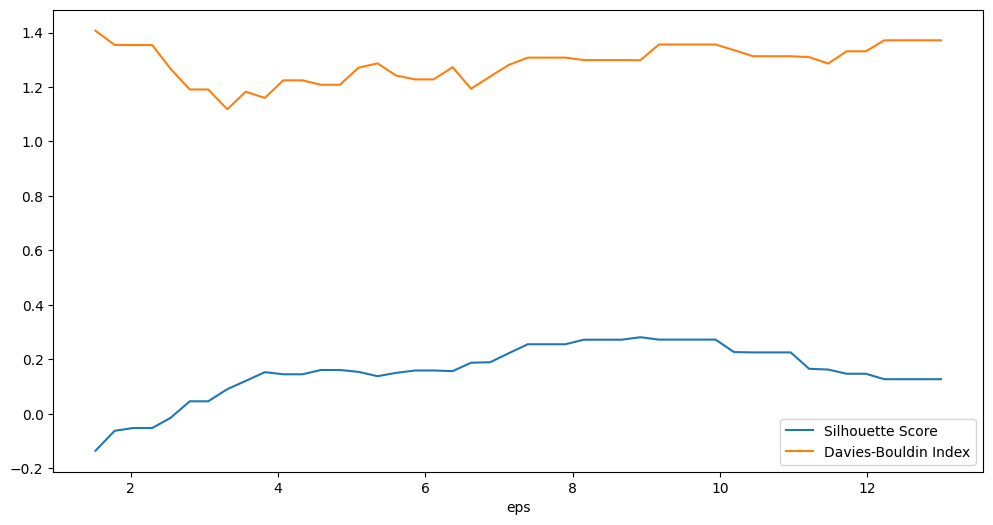

In [188]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

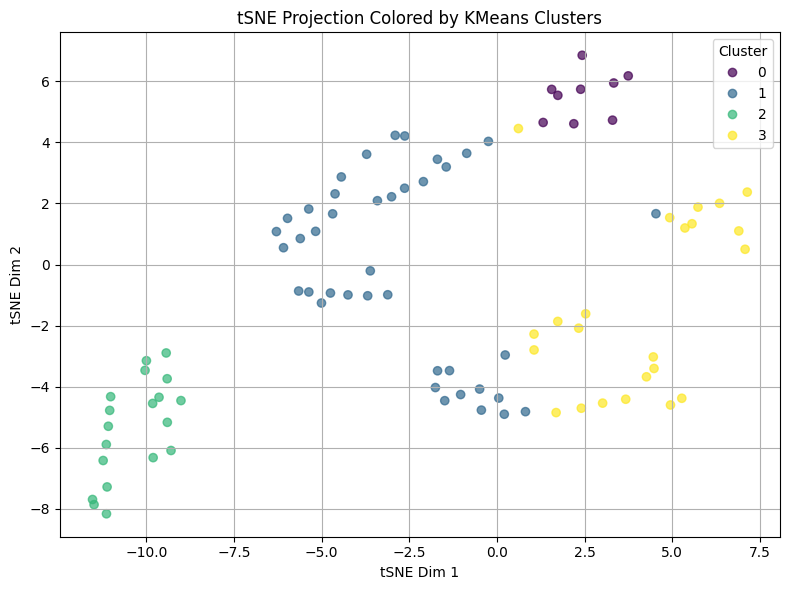

In [189]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        19    126          0.213213              0.613158
1   0.07            2        17     72         -0.240104              0.917646
2   0.09            2        11     50         -0.025411              0.765761
3   0.11            2         7     34         -0.007965              0.788775
4   0.13            2         5     25          0.187433              0.644823
5   0.15            2         3     20          0.456463              0.390498
6   0.17            2         2     15          0.589657              0.307474
7   0.19            2         1     11               NaN                   NaN
8   0.21            2         1      8               NaN                   NaN
9   0.22            2         1      8               NaN                   NaN
10  0.24            2         1      8               NaN                   NaN
11  0.26            2         1      7               NaN                   NaN
12  0.28            2         1      7               NaN                   NaN
13  0.30            2         1      7               NaN                   NaN
14  0.32            2         1      7               NaN                   NaN
15  0.34            2         1      7               NaN                   NaN
16  0.36            2         2      5          0.844029              0.174642
17  0.38            2         2      5          0.844029              0.174642
18  0.40            2         2      5          0.844029              0.174642
19  0.42            2         2      5          0.844029              0.174642
20  0.44            2         2      5          0.844029              0.174642
21  0.46            2         2      5          0.844029              0.174642
22  0.48            2         2      4          0.838876              0.176919
23  0.50            2         2      4          0.838876              0.176919
24  0.52            2         2      4          0.838876              0.176919
25  0.53            2         2      4          0.838876              0.176919
26  0.55            2         2      4          0.838876              0.176919
27  0.57            2         2      4          0.838876              0.176919
28  0.59            2         2      4          0.838876              0.176919
29  0.61            2         2      4          0.838876              0.176919
30  0.63            2         2      4          0.838876              0.176919
31  0.65            2         1      3               NaN                   NaN
32  0.67            2         1      3               NaN                   NaN
33  0.69            2         1      3               NaN                   NaN
34  0.71            2         1      3               NaN                   NaN
35  0.73            2         1      3               NaN                   NaN
36  0.75            2         1      3               NaN                   NaN
37  0.77            2         1      3               NaN                   NaN
38  0.79            2         1      3               NaN                   NaN
39  0.81            2         1      3               NaN                   NaN
40  0.83            2         1      3               NaN                   NaN
41  0.84            2         1      3               NaN                   NaN
42  0.86            2         1      3               NaN                   NaN
43  0.88            2         1      2               NaN                   NaN
44  0.90            2         1      2               NaN                   NaN
45  0.92            2         1      2               NaN                   NaN
46  0.94            2         1      1               NaN                   NaN
47  0.96            2         1      1               NaN                   NaN
48  0.98            2         1      1               NaN                   NaN
49  1.00            2         1      1               Na

<Axes: xlabel='eps'>

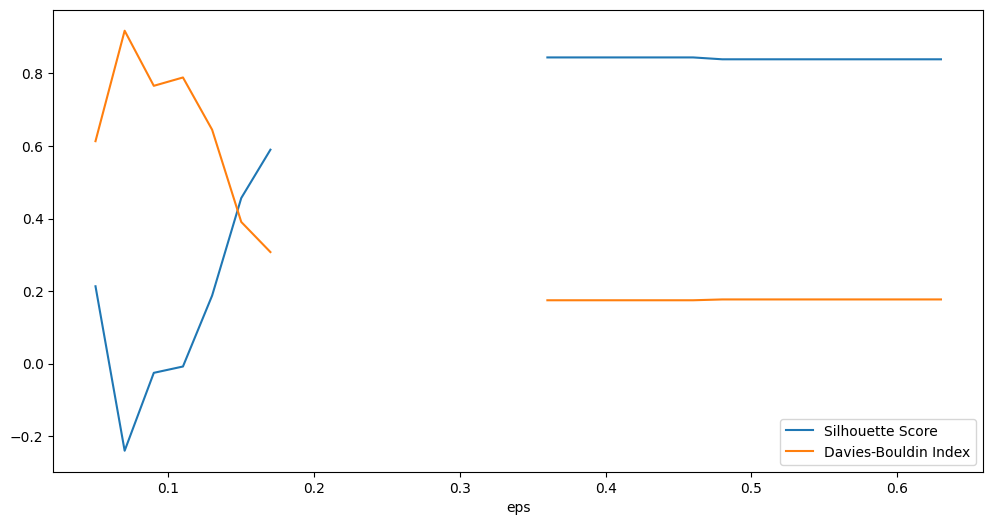

In [190]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [191]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [192]:
season = 4
season_year = 2007
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] 
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2007-12-01 to 2008-02-29
Columns: 264 entries, 10000009 to 25000592
dtypes: float64(264)
memory usage: 188.4 KB


None

            10000009  10000010  10000016  10000017  11000011  11000016  \
2007-12-01  1.047679  0.816355  0.630792  0.620969  0.763445  1.661382   
2007-12-02  1.367521  0.856743  0.610544  0.601037  0.888442  1.756620   
2007-12-03  1.283711  0.849639  0.632852  0.622998  0.989703  1.471331   
2007-12-04  1.246906  0.971979  0.746307  0.734686  1.046405  1.214079   
2007-12-05  1.171453  0.913740  0.679593  0.669010  1.071610  1.233629   
...              ...       ...       ...       ...       ...       ...   
2008-02-25  1.162793  0.662411  0.496464  0.488733  1.307924  1.267540   
2008-02-26  1.221183  0.717131  0.570380  0.561499  1.286543  1.400509   
2008-02-27  1.502255  0.794711  0.605251  0.595826  1.294359  1.602572   
2008-02-28  1.397231  0.721395  0.524615  0.516446  1.320389  1.516101   
2008-02-29  1.338614  0.668135  0.503184  0.495348  1.284080  1.446681   

            13000011  13000019  13000065  14000016  ...  64000025  66000014  \
2007-12-01  0.784002  1.278880  

          2007-12-01  2007-12-02  2007-12-03  2007-12-04  2007-12-05  \
10000009   -0.068153   -0.065539   -0.111333   -0.092985   -0.087099   
10000010   -0.085781   -0.104483   -0.144381   -0.113992   -0.106745   
10000016   -0.099922   -0.123255   -0.160885   -0.131236   -0.124594   
10000017   -0.100671   -0.123980   -0.161636   -0.132124   -0.125401   
11000011   -0.089813   -0.102066   -0.133717   -0.108305   -0.094710   
...              ...         ...         ...         ...         ...   
7000003    -0.043196   -0.040125   -0.085589   -0.039711   -0.036459   
8000001    -0.061897   -0.057871   -0.096942   -0.067618   -0.065400   
9000001    -0.021166   -0.009177   -0.043491   -0.018287   -0.023958   
9000015    -0.025734   -0.016641   -0.051388   -0.026538   -0.030720   
25000592   -0.040053   -0.054180   -0.098735   -0.089798   -0.080307   

          2007-12-06  2007-12-07  2007-12-08  2007-12-09  2007-12-10  ...  \
10000009   -0.069713   -0.109062   -0.112121   -0.110210  

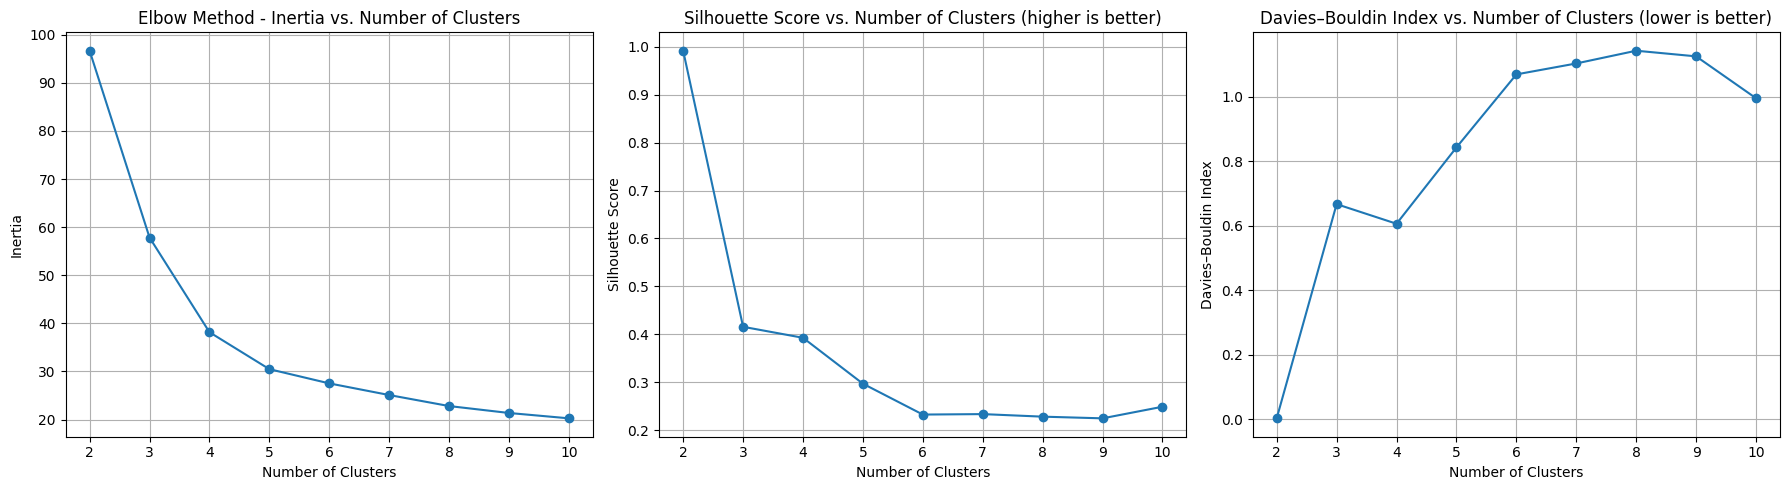

In [193]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000016        0
10000017        0
11000011        0

            10000009  10000010  10000016  10000017  11000011  11000016  \
2007-12-01  1.047679  0.816355  0.630792  0.620969  0.763445  1.661382   
2007-12-02  1.367521  0.856743  0.610544  0.601037  0.888442  1.756620   
2007-12-03  1.283711  0.849639  0.632852  0.622998  0.989703  1.471331   
2007-12-04  1.246906  0.971979  0.746307  0.734686  1.046405  1.214079   
2007-12-05  1.171453  0.913740  0.679593  0.669010  1.071610  1.233629   
...              ...       ...       ...       ...       ...       ...   
2008-02-25  1.162793  0.662411  0.496464  0.488733  1.307924  1.267540   
2008-02-26  1.221183  0.717131  0.570380  0.561499  1.286543  1.400509   
2008-02-27  1.502255  0.794711  0.605251  0.595826  1.294359  1.602572   
2008-02-28  1.397231  0.721395  0.524615  0.516446  1.320389  1.516101   
2008-02-29  1.338614  0.668135  0.503184  0.495348  1.284080  1.446681   

            13000011  13000019  13000065  14000016  ...  64000025  66000014  \
2007-12-01  0.784002  1.278880  

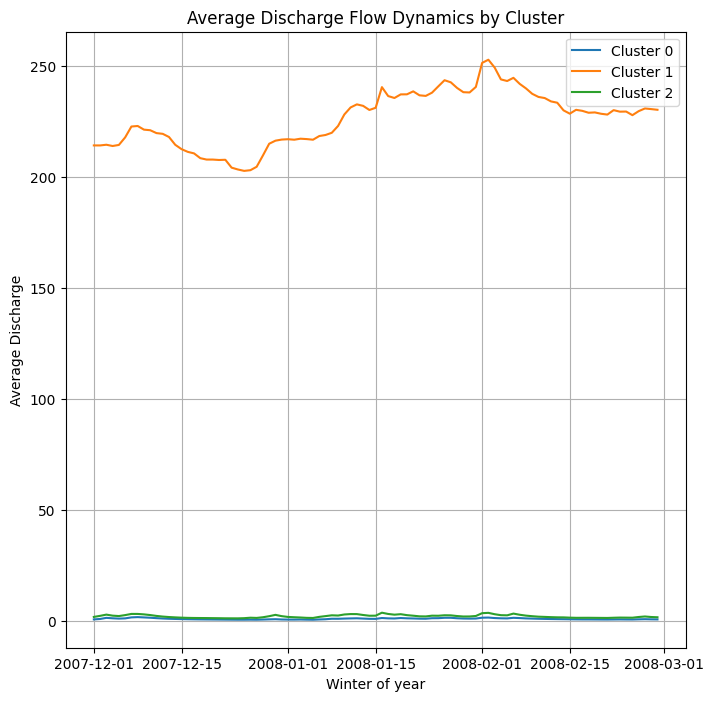

In [194]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [195]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [196]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000016  10000017  11000011  11000016  \
2007-12-01  1.047679  0.816355  0.630792  0.620969  0.763445  1.661382   
2007-12-02  1.367521  0.856743  0.610544  0.601037  0.888442  1.756620   
2007-12-03  1.283711  0.849639  0.632852  0.622998  0.989703  1.471331   
2007-12-04  1.246906  0.971979  0.746307  0.734686  1.046405  1.214079   
2007-12-05  1.171453  0.913740  0.679593  0.669010  1.071610  1.233629   
...              ...       ...       ...       ...       ...       ...   
2008-02-25  1.162793  0.662411  0.496464  0.488733  1.307924  1.267540   
2008-02-26  1.221183  0.717131  0.570380  0.561499  1.286543  1.400509   
2008-02-27  1.502255  0.794711  0.605251  0.595826  1.294359  1.602572   
2008-02-28  1.397231  0.721395  0.524615  0.516446  1.320389  1.516101   
2008-02-29  1.338614  0.668135  0.503184  0.495348  1.284080  1.446681   

            13000011  13000019  13000065  14000016  ...  64000025  66000014  \
2007-12-01  0.784002  1.278880  0.932039  1.202440  ...  0.168493  0.901470   
2007-12-02  0.888823  1.679656  1.287354  1.416841  ...  0.228857  1.346153   
2007-12-03  1.034982  1.375896  1.321453  1.343119  ...  0.975264  3.561801   
2007-12-04  1.138745  1.413436  1.308382  1.372438  ...  0.886333  2.289163   
2007-12-05  1.105946  1.346188  1.122008  1.290163  ...  0.667240  1.794730   
...              ...       ...       ...       ...  ...       ...       ...   
2008-02-25  0.784007  1.044820  1.546476  1.111935  ...  0.265651  0.337719   
2008-02-26  0.929767  1.215043  1.412690  1.160841  ...  0.300387  0.351098   
2008-02-27  0.991675  1.430835  1.034247  1.318204  ...  0.315058  0.361236   
2008-02-28  0.845705  1.186038  1.604886  1.191516  ...  0.254149  0.368501   
2008-02-29  0.807702  1.065510  1.622084  1.127463  ...  0.254326  0.351717   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2007-12-01  0.771826  1.374803  0.993466  1.375167  1.129774  1.664262   
2007-12-02  0.724774  3.164196  0.940752  1.700846  1.468088  2.106743   
2007-12-03  2.194148  8.169888  2.586980  1.621867  1.472746  2.174808   
2007-12-04  1.775583  4.437292  2.118037  1.944111  1.578890  2.224495   
2007-12-05  0.941059  2.686692  1.183068  1.835754  1.456100  1.999741   
...              ...       ...       ...       ...       ...       ...   
2008-02-25  0.226814  0.673308  0.408948  0.889207  1.125957  2.819482   
2008-02-26  0.228057  0.726464  0.411473  0.900546  1.121431  2.859913   
2008-02-27  0.229300  0.766012  0.413997  1.047721  1.277152  2.878459   
2008-02-28  0.230542  0.793495  0.416521  0.912631  1.184713  3.273492   
2008-02-29  0.231785  0.719990  0.426619  0.820828  1.102922  2.487557   

             9000015  25000592  
2007-12-01  1.604313  1.416422  
2007-12-02  2.008853  1.516498  
2007-12-03  2.071081  1.449196  
2007-12-04  2.116509  1.288616  
2007-12-05  1.911026  1.260550  
...              ...       ...  
2008-02-25  2.660478  0.824098  
2008-02-26  2.697442  0.952919  
2008-02-27  2.714397  0.906664  
2008-02-28  3.075558  0.833956  
2008-02-29  2.357014  0.820016  

[91 rows x 264 columns]

<Axes: >

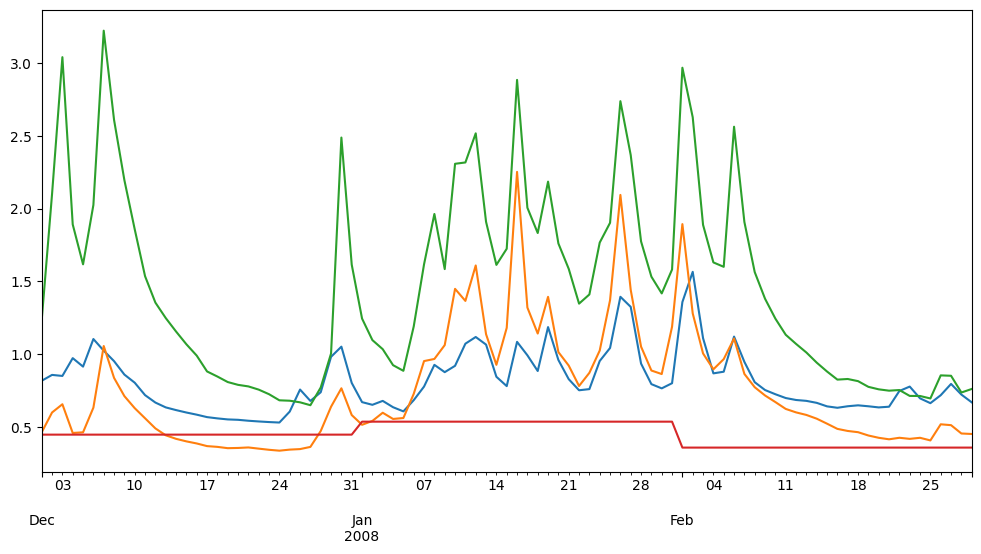

In [197]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

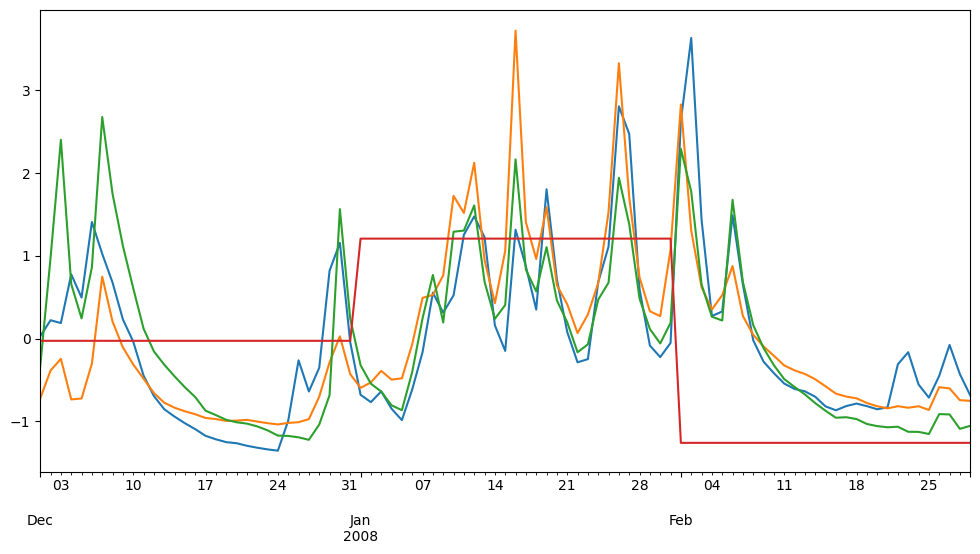

In [198]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

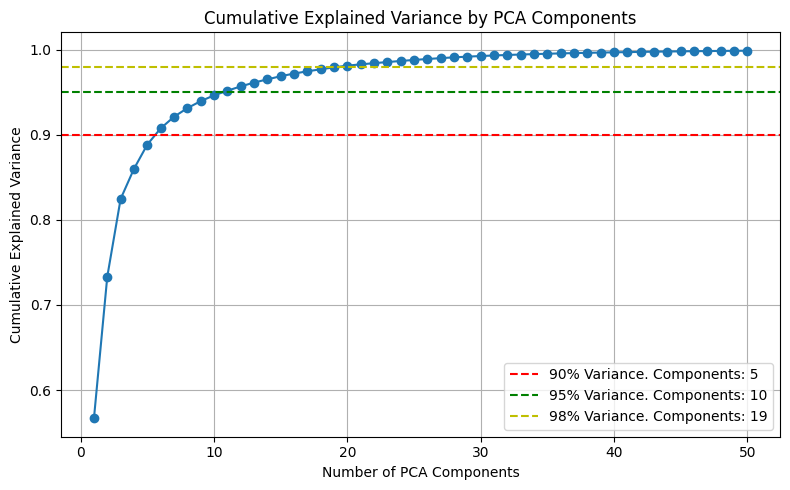

In [199]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [200]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -8.25083777,  -2.92169516, -10.08672474, ...,  -1.19046567,
          0.6362548 ,  -0.14736401],
       [ -0.1556756 ,  -3.46666763, -11.4776422 , ...,  -1.03173643,
         -0.1723036 ,   0.28983352],
       [ 14.85224784, -15.30031915,  -8.47721357, ...,   0.08419425,
         -0.33434639,   0.32291082],
       ...,
       [ -5.06215684,   3.88030874,  -0.30762981, ...,  -0.53827622,
          1.59445373,  -0.19539323],
       [ -8.72586995,   3.35208502,   1.00609557, ...,  -0.39538355,
          2.16163349,   0.70497696],
       [-10.61668012,   2.83508463,   1.00544418, ...,  -0.79388947,
          1.38709371,   0.10959038]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31004\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


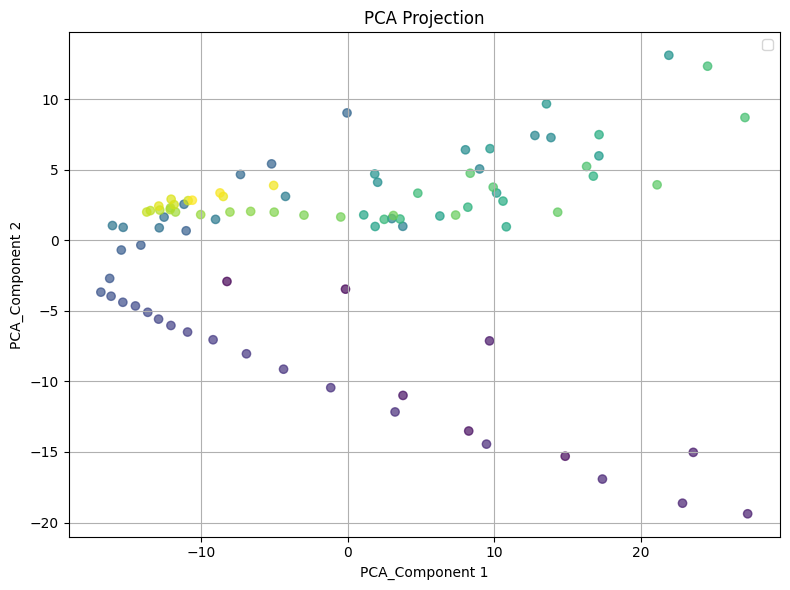

In [201]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31004\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


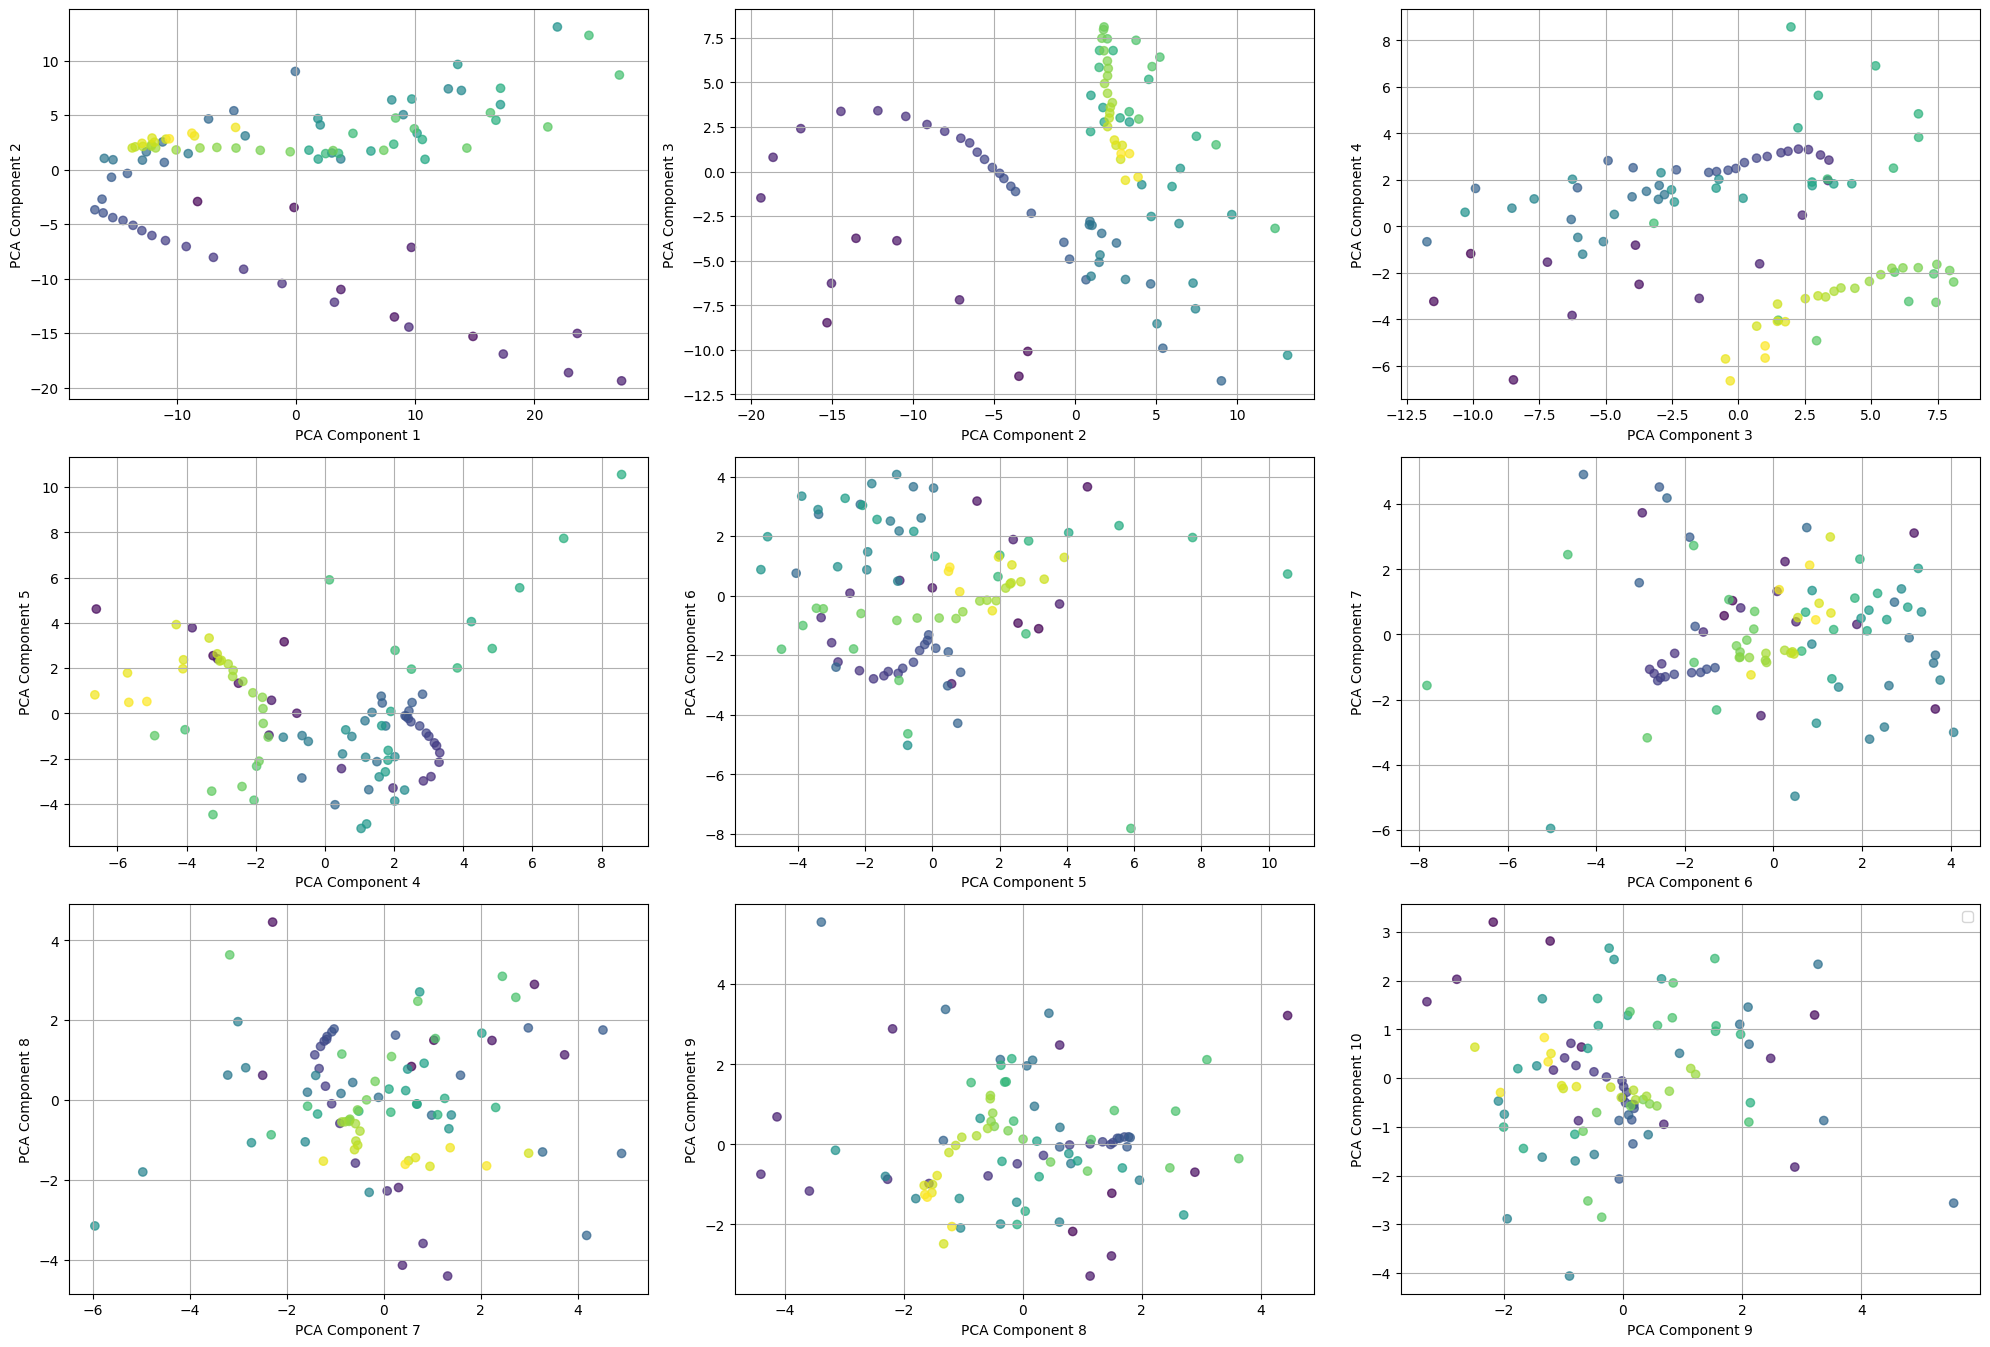

In [202]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [203]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.284
KMeans Davies-Bouldin Index is 1.301


<Axes: xlabel='k'>

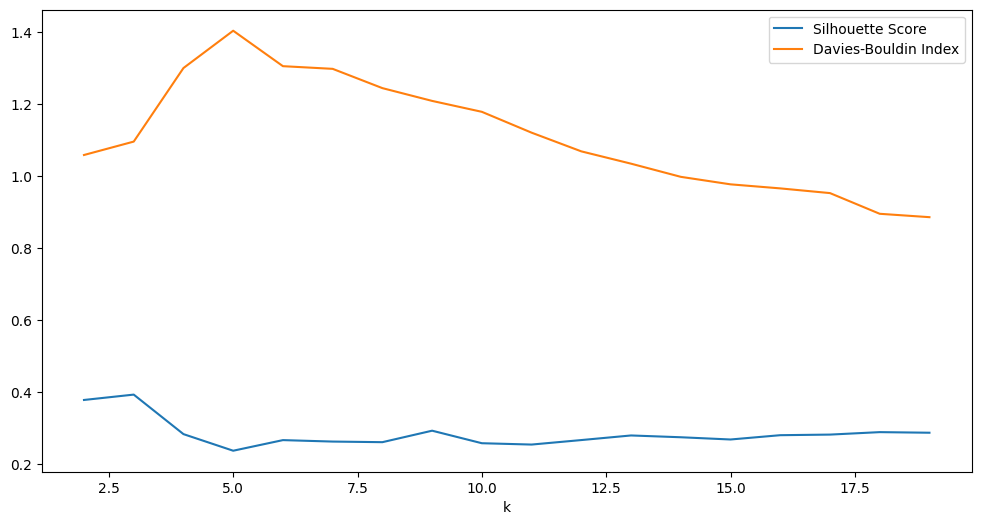

In [204]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         1     88               NaN   
3    1.27            3         2     79         -0.014852   
4    1.52            3         2     79         -0.014852   
5    1.78            3         2     78         -0.002888   
6    2.03            3         3     72         -0.034881   
7    2.29            3         3     72         -0.034881   
8    2.54            3         3     68          0.014143   
9    2.80            3         3     65          0.024298   
10   3.05            3         3     64          0.026556   
11   3.31            3         2     64          0.109359   
12   3.56            3         2     64          0.109359   
13   3.82            3         2     61          0.133883   
14   4.07            3         2     60          0.127120   
15   4.33            3         3     55          0.145111   
16   4.58            3         3     52          0.182668   
17   4.84            3         4     46          0.023880   
18   5.09            3         4     45          0.016758   
19   5.35            3         5     41          0.035519   
20   5.60            3         5     38          0.018985   
21   5.86            3         5     38          0.018985   
22   6.11            3         5     37          0.022530   
23   6.37            3         4     36          0.062642   
24   6.62            3         4     36          0.062642   
25   6.88            3         4     36          0.062642   
26   7.13            3         5     31          0.059299   
27   7.39            3         4     30          0.093723   
28   7.64            3         2     26          0.154289   
29   7.90            3         2     24          0.162662   
30   8.15            3         2     22          0.153854   
31   8.41            3         3     19          0.148899   
32   8.66            3         3     18          0.148157   
33   8.92            3         2     18          0.265353   
34   9.17            3         1     18               NaN   
35   9.43            3         2     12          0.133002   
36   9.68            3         2     11          0.137098   
37   9.94            3         2     11          0.137098   
38  10.19            3         2      9          0.143835   
39  10.45            3         2      9          0.143835   
40  10.70            3         2      8          0.134835   
41  10.96            3         1      6               NaN   
42  11.21            3         1      6               NaN   
43  11.47            3         1      5               NaN   
44  11.72            3         1      5               NaN   
45  11.98            3         1      4               NaN   
46  12.23            3         1      4               NaN   
47  12.49            3         1      3               NaN   
48  12.74            3         1      2               NaN   
49  13.00            3         1      2               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               0.987589  
4               0.987589  
5               0.990792  
6               1.182445  
7               1.182445  
8               1.097759  
9               1.133889  
10              1.142849  
11              1.186011  
12              1.186011  
13              1.186491  
14              1.246203  
15              1.034831  
16              1.018799  
17              1.588455  
18              1.602085  
19              1.576661  
20              1.571023  
21              1.571023  
22              1.645045  
23              1.578328  
24              1.578328  
25              1.578328  
26              1.644837  
27              1.708677  
28              1.704494  
29              1.620078  
30              1.689187  
31              1.563935  
32 

<Axes: xlabel='eps'>

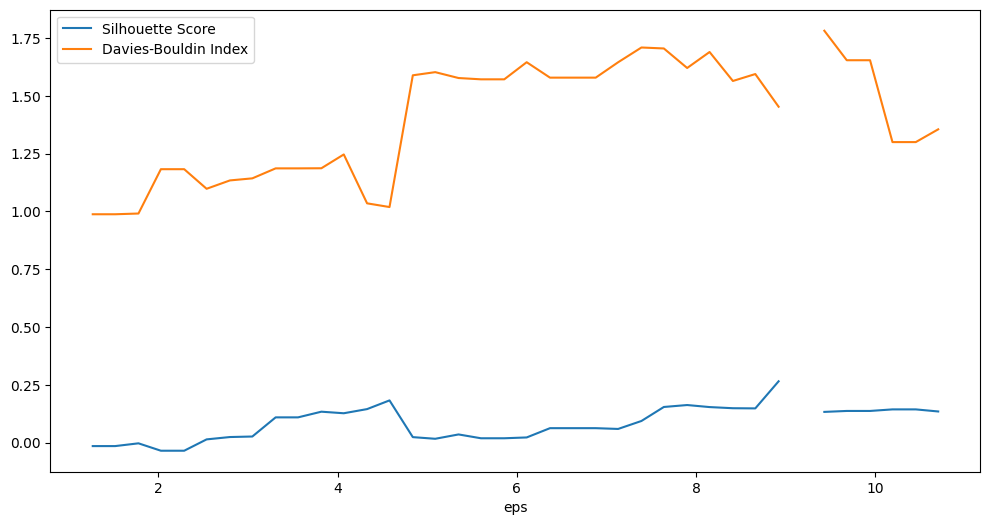

In [205]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

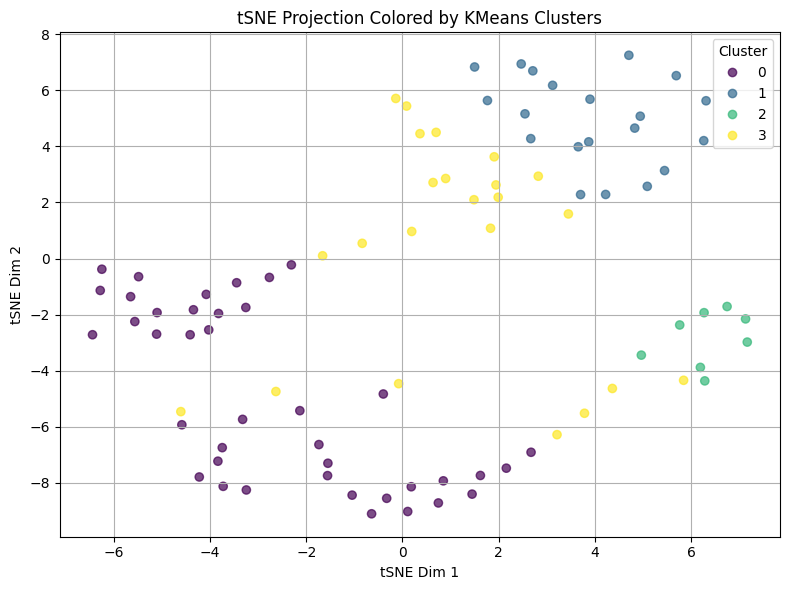

In [206]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        20    210          0.693508   
1    0.05            2        27    191          0.581160   
2    0.06            2        24    186          0.492455   
3    0.06            2        29    174          0.472681   
4    0.07            2        29    161          0.375036   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.798628   
196  0.99            2         2      2          0.798628   
197  0.99            2         2      2          0.798628   
198  1.00            2         2      2          0.798628   
199  1.00            2         2      2          0.798628   

     Davies-Bouldin Index  
0                0.341696  
1                0.490740  
2                0.532894  
3                0.557137  
4                0.586793  
..                    ...  
195              0.260323  
196              0.260323  
197              0.260323  
198              0.260323  
199              0.260323  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

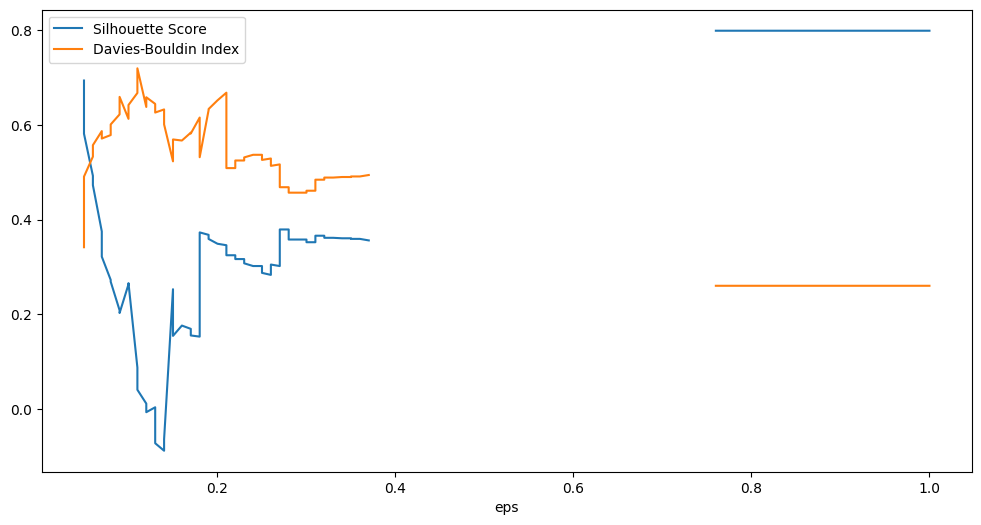

In [207]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))